In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
from scipy.io import loadmat, savemat
from scipy.stats import gaussian_kde
import chaospy as cp
import numpoly
import seaborn as sns

GENERATE INPUT DISTRIBUTIONS

In [2]:
# Distribution Parameters
np.random.seed(1)
#hard material: steel
#soft material: nylon 6

E_s_mean = 200e6
# E_s_range = 100e6
E_s_std = E_s_mean*0.08
E_h_mean = 200e9
# E_h_range = 100e9
E_h_std = E_h_mean*0.02

rho_s_mean = 1e3
#rho_s_range = 5e2
rho_s_std = rho_s_mean*0.08
rho_h_mean = 8e3
#rho_h_range = 4e3
rho_h_std = rho_h_mean*0.02

pr_s_mean = 0.38
#pr_s_range = 0.25
pr_s_std = pr_s_mean*0.02
pr_h_mean = 0.28
#pr_h_range = 0.25
pr_h_std = pr_h_mean*0.02

geo_fp_mean = 0.025
geo_fp_std = geo_fp_mean*0.08

#Create Gaussian Distributions
E_soft_dist = cp.Normal(E_s_mean, E_s_std)
E_hard_dist = cp.Normal(E_h_mean, E_h_std)
rho_soft_dist = cp.Normal(rho_s_mean, rho_s_std)
rho_hard_dist = cp.Normal(rho_h_mean, rho_h_std)
pr_soft_dist = cp.Normal(pr_s_mean, pr_s_std)
pr_hard_dist = cp.Normal(pr_h_mean, pr_h_std)
geo_fp_dist = cp.Normal(geo_fp_mean, geo_fp_std)
joint_dist = cp.J(E_soft_dist, E_hard_dist, rho_soft_dist, rho_hard_dist, pr_soft_dist, pr_hard_dist, geo_fp_dist)

Text(0.5, 0.98, 'Histograms of 100 MC samples OF 6+1D Input Space - Truncated Gaussian Distributions')

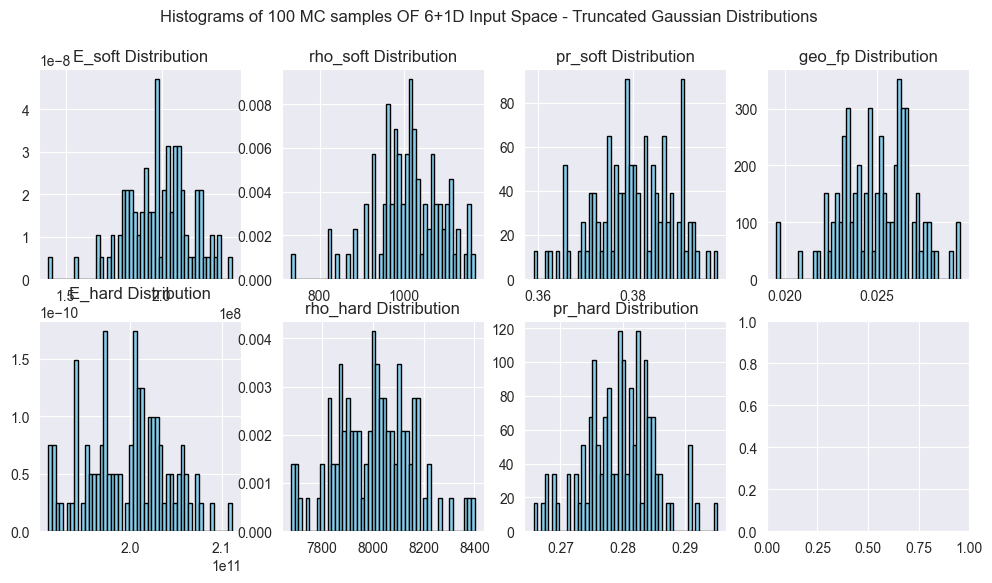

In [3]:
fig, axes = plt.subplots(2, 4, figsize=(12, 6))

# Plotting the distributions
axes[0, 0].hist(E_soft_dist.sample(size=100), bins=50, density=True, color='skyblue', edgecolor='black')
axes[0, 0].set_title('E_soft Distribution')

axes[1, 0].hist(E_hard_dist.sample(size=100), bins=50, density=True, color='skyblue', edgecolor='black')
axes[1, 0].set_title('E_hard Distribution')

axes[0, 1].hist(rho_soft_dist.sample(size=100), bins=50, density=True, color='skyblue', edgecolor='black')
axes[0, 1].set_title('rho_soft Distribution')

axes[1, 1].hist(rho_hard_dist.sample(size=100), bins=50, density=True, color='skyblue', edgecolor='black')
axes[1, 1].set_title('rho_hard Distribution')

axes[0, 2].hist(pr_soft_dist.sample(size=100), bins=50, density=True, color='skyblue', edgecolor='black')
axes[0, 2].set_title('pr_soft Distribution')

axes[1, 2].hist(pr_hard_dist.sample(size=100), bins=50, density=True, color='skyblue', edgecolor='black')
axes[1, 2].set_title('pr_hard Distribution')

axes[0, 3].hist(geo_fp_dist.sample(size=100), bins=50, density=True, color='skyblue', edgecolor='black')
axes[0, 3].set_title('geo_fp Distribution')

title_str = 'Histograms of 100 MC samples OF 6+1D Input Space - Truncated Gaussian Distributions'
fig.suptitle(title_str)

Text(0.5, 0.98, 'Histograms of 1000 MC samples OF 6+1D Input Space - Truncated Gaussian Distributions')

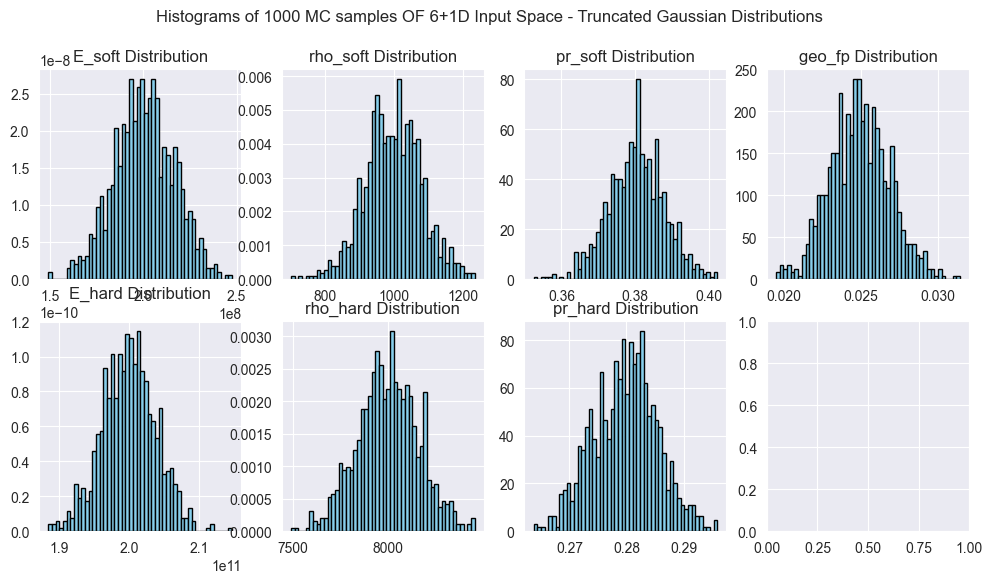

In [4]:
fig, axes = plt.subplots(2, 4, figsize=(12, 6))

# Plotting the distributions
axes[0, 0].hist(E_soft_dist.sample(size=1000), bins=50, density=True, color='skyblue', edgecolor='black')
axes[0, 0].set_title('E_soft Distribution')

axes[1, 0].hist(E_hard_dist.sample(size=1000), bins=50, density=True, color='skyblue', edgecolor='black')
axes[1, 0].set_title('E_hard Distribution')

axes[0, 1].hist(rho_soft_dist.sample(size=1000), bins=50, density=True, color='skyblue', edgecolor='black')
axes[0, 1].set_title('rho_soft Distribution')

axes[1, 1].hist(rho_hard_dist.sample(size=1000), bins=50, density=True, color='skyblue', edgecolor='black')
axes[1, 1].set_title('rho_hard Distribution')

axes[0, 2].hist(pr_soft_dist.sample(size=1000), bins=50, density=True, color='skyblue', edgecolor='black')
axes[0, 2].set_title('pr_soft Distribution')

axes[1, 2].hist(pr_hard_dist.sample(size=1000), bins=50, density=True, color='skyblue', edgecolor='black')
axes[1, 2].set_title('pr_hard Distribution')

axes[0, 3].hist(geo_fp_dist.sample(size=1000), bins=50, density=True, color='skyblue', edgecolor='black')
axes[0, 3].set_title('geo_fp Distribution')

title_str = 'Histograms of 1000 MC samples OF 6+1D Input Space - Truncated Gaussian Distributions'
fig.suptitle(title_str)

Text(0.5, 0.98, 'Histograms of 10000 MC samples OF 6+1D Input Space - Truncated Gaussian Distributions')

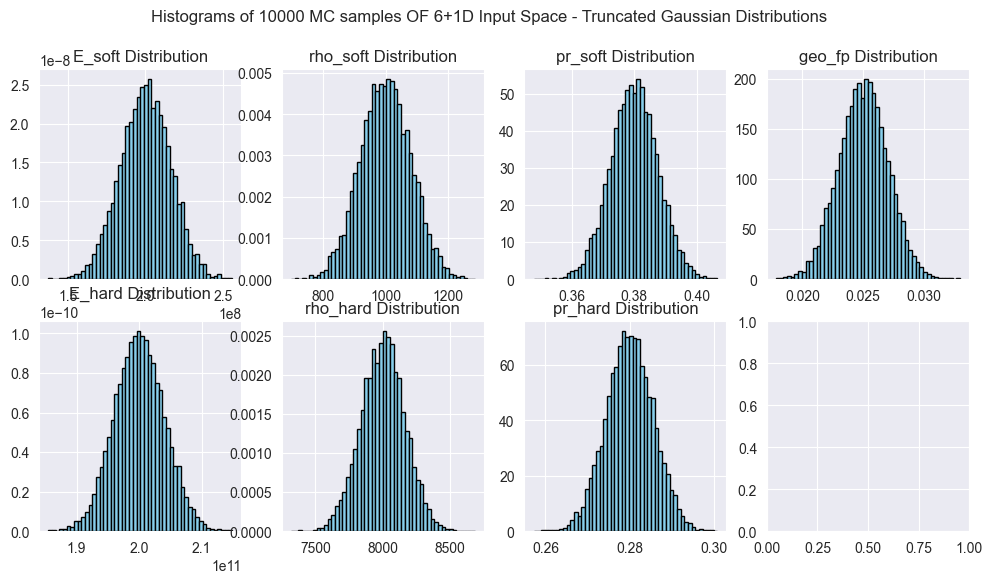

In [5]:
fig, axes = plt.subplots(2, 4, figsize=(12, 6))

# Plotting the distributions
axes[0, 0].hist(E_soft_dist.sample(size=10000), bins=50, density=True, color='skyblue', edgecolor='black')
axes[0, 0].set_title('E_soft Distribution')

axes[1, 0].hist(E_hard_dist.sample(size=10000), bins=50, density=True, color='skyblue', edgecolor='black')
axes[1, 0].set_title('E_hard Distribution')

axes[0, 1].hist(rho_soft_dist.sample(size=10000), bins=50, density=True, color='skyblue', edgecolor='black')
axes[0, 1].set_title('rho_soft Distribution')

axes[1, 1].hist(rho_hard_dist.sample(size=10000), bins=50, density=True, color='skyblue', edgecolor='black')
axes[1, 1].set_title('rho_hard Distribution')

axes[0, 2].hist(pr_soft_dist.sample(size=10000), bins=50, density=True, color='skyblue', edgecolor='black')
axes[0, 2].set_title('pr_soft Distribution')

axes[1, 2].hist(pr_hard_dist.sample(size=10000), bins=50, density=True, color='skyblue', edgecolor='black')
axes[1, 2].set_title('pr_hard Distribution')

axes[0, 3].hist(geo_fp_dist.sample(size=10000), bins=50, density=True, color='skyblue', edgecolor='black')
axes[0, 3].set_title('geo_fp Distribution')

title_str = 'Histograms of 10000 MC samples OF 6+1D Input Space - Truncated Gaussian Distributions'
fig.suptitle(title_str)

In [6]:
#Create truncated variants of Gaussian distributions
E_soft_dist_trunc = cp.TruncNormal(lower=E_s_mean-4*E_s_std, upper=E_s_mean+4*E_s_std, mu=E_s_mean, sigma=E_s_std)
E_hard_dist_trunc = cp.TruncNormal(lower=E_h_mean-4*E_h_std, upper=E_h_mean+4*E_h_std, mu=E_h_mean, sigma=E_h_std)
rho_soft_dist_trunc = cp.TruncNormal(lower=rho_s_mean-4*rho_s_std, upper=rho_s_mean+4*rho_s_std, mu=rho_s_mean, sigma=rho_s_std)
rho_hard_dist_trunc = cp.TruncNormal(lower=rho_h_mean-4*rho_h_std, upper=rho_h_mean+4*rho_h_std, mu=rho_h_mean, sigma=rho_h_std)
pr_soft_dist_trunc = cp.TruncNormal(lower=pr_s_mean-4*pr_s_std, upper=pr_s_mean+4*pr_s_std, mu=pr_s_mean, sigma=pr_s_std)
pr_hard_dist_trunc = cp.TruncNormal(lower=pr_h_mean-4*pr_h_std, upper=pr_h_mean+4*pr_h_std, mu=pr_h_mean, sigma=pr_h_std)
geo_fp_dist_trunc = cp.TruncNormal(lower=geo_fp_mean-4*geo_fp_std, upper=geo_fp_mean+4*geo_fp_std, mu=geo_fp_mean, sigma=geo_fp_std)
joint_dist_trunc = cp.J(E_soft_dist_trunc, E_hard_dist_trunc, rho_soft_dist_trunc, rho_hard_dist_trunc, pr_soft_dist_trunc, pr_hard_dist_trunc, geo_fp_dist_trunc)

Text(0.5, 1.0, 'geo_fp Distribution')

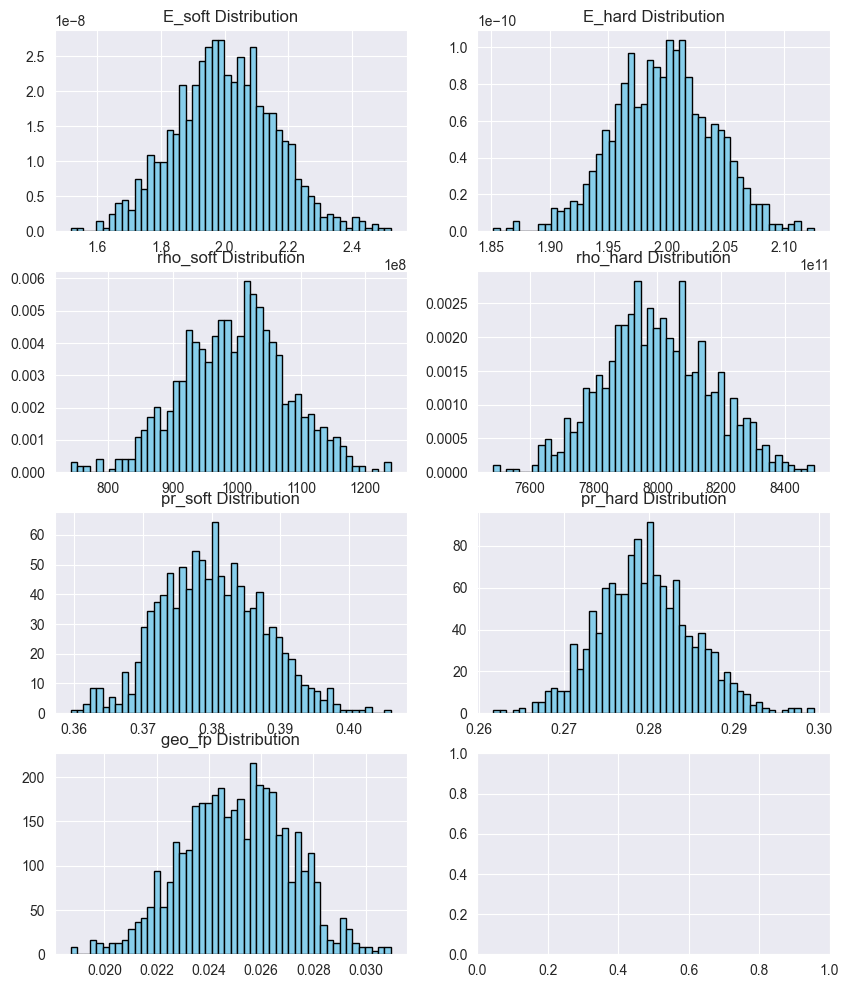

In [7]:
# Create a 3x2 grid of subplots
fig, axes = plt.subplots(4, 2, figsize=(10, 12))

# Plotting the distributions
axes[0, 0].hist(E_soft_dist_trunc.sample(size=1000), bins=50, density=True, color='skyblue', edgecolor='black')
axes[0, 0].set_title('E_soft Distribution')

axes[0, 1].hist(E_hard_dist_trunc.sample(size=1000), bins=50, density=True, color='skyblue', edgecolor='black')
axes[0, 1].set_title('E_hard Distribution')

axes[1, 0].hist(rho_soft_dist_trunc.sample(size=1000), bins=50, density=True, color='skyblue', edgecolor='black')
axes[1, 0].set_title('rho_soft Distribution')

axes[1, 1].hist(rho_hard_dist_trunc.sample(size=1000), bins=50, density=True, color='skyblue', edgecolor='black')
axes[1, 1].set_title('rho_hard Distribution')

axes[2, 0].hist(pr_soft_dist_trunc.sample(size=1000), bins=50, density=True, color='skyblue', edgecolor='black')
axes[2, 0].set_title('pr_soft Distribution')

axes[2, 1].hist(pr_hard_dist_trunc.sample(size=1000), bins=50, density=True, color='skyblue', edgecolor='black')
axes[2, 1].set_title('pr_hard Distribution')

axes[3, 0].hist(geo_fp_dist_trunc.sample(size=1000), bins=50, density=True, color='skyblue', edgecolor='black')
axes[3, 0].set_title('geo_fp Distribution')

In [8]:
### GENERATE QUADRATURE RULE SAMPLES ###
degrees = [1, 2, 3]
#computation points = (degree+1)**(input dimensions)
quadrature_surrogates = {}
quadrature_nodes = {}
quadrature_weights = {}
for d in degrees:
    #nodes, weights = cp.generate_quadrature(d, joint_dist, rule='G')
    nodes, weights = cp.generate_quadrature(d, joint_dist_trunc, rule='G')
    #nodes, weights = cp.quadrature.legendre(order=d, lower=E_soft_dist.lower, upper=E_soft_dist.upper)
    quadrature_nodes[d] = nodes
    quadrature_weights[d] = weights
#quadrature_nodes

for qd in quadrature_nodes:
    #savemat('joint_dist_mat_geo_pd_'+str(qd)+'.mat',{'pd_'+str(qd)+'_inputs':quadrature_nodes[qd]})
    savemat('joint_dist_mat_geo_trunc_pd_'+str(qd)+'.mat',{'pd_'+str(qd)+'_inputs':quadrature_nodes[qd]})
    savemat('geo_dist_trunc_pd_'+str(qd)+'.mat',{'pd_'+str(qd)+'_geos':quadrature_nodes[qd][6]})

print(np.mean(quadrature_nodes[1][6]))

0.025


In [9]:
### GENERATE SPARSE GRID QUADRATURE RULE SAMPLES ###
sparse_degrees = [1, 2, 3]
# For Smolyak sparse grids, computation points won't necessarily be (degree+1)**(input dimensions)
sparse_surrogates = {}
sparse_nodes = {}
sparse_weights = {}

for d in sparse_degrees:
    nodes, weights = cp.generate_quadrature(order=d, dist=joint_dist, rule='G', sparse=True)
    sparse_nodes[d] = nodes
    sparse_weights[d] = weights

for qd in sparse_nodes:
    savemat('joint_dist_mat_geo_pd_'+str(qd)+'_sparse.mat', {'pd_'+str(qd)+'_inputs': sparse_nodes[qd]})
    savemat('geo_dist_gauss_trunc_pd_'+str(qd)+'_sparse.mat', {'pd_'+str(qd)+'_geos': sparse_nodes[qd][6]})

print(np.mean(sparse_nodes[1][6]))

0.02500000000000001


In [10]:
### GENERATE MONTE CARLO INPUT SAMPLES ###
N_MC2 = 100
N_MC3 = 1000
N_MC4 = 10000

joint_samples_MC2 = joint_dist_trunc.sample(N_MC2)
joint_samples_MC3 = joint_dist_trunc.sample(N_MC3)
joint_samples_MC4 = joint_dist_trunc.sample(N_MC4)

savemat('joint_dist_trunc_mc_'+str(N_MC2)+'.mat',{'mc_'+str(N_MC2)+'_inputs':joint_samples_MC2})
savemat('joint_dist_trunc_mc_'+str(N_MC3)+'.mat',{'mc_'+str(N_MC3)+'_inputs':joint_samples_MC3})
savemat('joint_dist_trunc_mc_'+str(N_MC4)+'.mat',{'mc_'+str(N_MC4)+'_inputs':joint_samples_MC4})

In [11]:
print(joint_samples_MC2.shape)
print(joint_samples_MC2[-1::].shape)
geo_fp_dist_trunc_MC2 = joint_samples_MC2[-1::]
geo_fp_dist_trunc_MC3 = joint_samples_MC3[-1::]
geo_fp_dist_trunc_MC4 = joint_samples_MC4[-1::]

savemat('geo_fp_dist_trunc_mc_'+str(N_MC2)+'.mat',{'mc_'+str(N_MC2)+'_geos':geo_fp_dist_trunc_MC2})
savemat('geo_fp_dist_trunc_mc_'+str(N_MC3)+'.mat',{'mc_'+str(N_MC3)+'_geos':geo_fp_dist_trunc_MC3})
savemat('geo_fp_dist_trunc_mc_'+str(N_MC4)+'.mat',{'mc_'+str(N_MC4)+'_geos':geo_fp_dist_trunc_MC4})

(7, 100)
(1, 100)


QUADRATURE INPUT DISTRIBUTIONS GENERATED - MATLAB RUNS COMMENCE

In [12]:
E_soft_sample_sets = {}
E_hard_sample_sets = {}
rho_soft_sample_sets = {}
rho_hard_sample_sets = {}
pr_soft_sample_sets = {}
pr_hard_sample_sets = {}
geo_fp_sample_sets = {}
bg_size_sample_sets = {}
bg_top_sample_sets = {}
bg_bottom_sample_sets = {}
bg_center_sample_sets = {}

for d in degrees:
    folder_name = 'gaussian 6+1 inputs quadrature rule study'#+str(d)
    #file_suffix = '_q_pd'+str(d)+'_uniform_'+str((d+1)**6)+'.mat'
    file_suffix ='_gaussian_7d_fp_5%_n'+str((d+1)**7)+'.mat'
    E_soft_file = loadmat(folder_name+'/E_soft'+file_suffix)
    E_hard_file = loadmat(folder_name+'/E_hard'+file_suffix)
    rho_soft_file = loadmat(folder_name+'/rho_soft'+file_suffix)
    rho_hard_file = loadmat(folder_name+'/rho_hard'+file_suffix)
    pr_soft_file = loadmat(folder_name+'/pr_soft'+file_suffix)
    pr_hard_file = loadmat(folder_name+'/pr_hard'+file_suffix)

    bg_size_file = loadmat(folder_name+'/bg_size'+file_suffix)
    bg_top_file = loadmat(folder_name+'/bg_top'+file_suffix)
    bg_bottom_file = loadmat(folder_name+'/bg_bottom'+file_suffix)

    E_soft_sample_sets[d] = E_soft_file['E_soft'][:]
    E_hard_sample_sets[d] = E_hard_file['E_hard'][:]
    rho_soft_sample_sets[d] = rho_soft_file['rho_soft'][:]
    rho_hard_sample_sets[d] = rho_hard_file['rho_hard'][:]
    pr_soft_sample_sets[d] = pr_soft_file['pr_soft'][:]
    pr_hard_sample_sets[d] = pr_hard_file['pr_hard'][:]

    bg_size_sample_sets[d] = bg_size_file['bg_size'][:]
    bg_top_sample_sets[d] = bg_top_file['bg_top'][:]
    bg_bottom_sample_sets[d] = bg_bottom_file['bg_bottom'][:]
    bg_center_sample_sets[d] = (bg_top_sample_sets[d]+bg_bottom_sample_sets[d])/2

In [13]:
rho_soft_SG_sets = {}
rho_hard_SG_sets = {}
K_soft_SG_sets = {}
K_hard_SG_sets = {}
G_soft_SG_sets = {}
G_hard_SG_sets = {}
E_soft_SG_sets = {}
E_hard_SG_sets = {}
pr_soft_SG_sets = {}
pr_hard_SG_sets = {}
geo_fp_SG_sets = {}
bg_size_SG_sets = {}
bg_top_SG_sets = {}
bg_bottom_SG_sets = {}
bg_center_SG_sets = {}

sparse_degrees = [1,2,3]
d_n_map = {1:15, 2:119, 3:667}
for d in sparse_degrees:

    folder_name = 'gaussian 6+1 inputs quadrature rule sparse study'#+str(d)
    file_suffix ='_gaussian_7d_fp_5%_n'+str(d_n_map[d])+'.mat'

    rho_soft_file = loadmat(folder_name+'/rho_soft'+file_suffix)
    rho_hard_file = loadmat(folder_name+'/rho_hard'+file_suffix)
    # K_soft_file = loadmat(folder_name+'/K_soft'+file_suffix)
    # K_hard_file = loadmat(folder_name+'/K_hard'+file_suffix)
    # G_soft_file = loadmat(folder_name+'/G_soft'+file_suffix)
    # G_hard_file = loadmat(folder_name+'/G_hard'+file_suffix)
    E_soft_file = loadmat(folder_name+'/E_soft'+file_suffix)
    E_hard_file = loadmat(folder_name+'/E_hard'+file_suffix)
    pr_soft_file = loadmat(folder_name+'/pr_soft'+file_suffix)
    pr_hard_file = loadmat(folder_name+'/pr_hard'+file_suffix)

    bg_size_file = loadmat(folder_name+'/bg_size'+file_suffix)
    bg_top_file = loadmat(folder_name+'/bg_top'+file_suffix)
    bg_bottom_file = loadmat(folder_name+'/bg_bottom'+file_suffix)

    rho_soft_SG_sets[d] = rho_soft_file['rho_soft'][:]
    rho_hard_SG_sets[d] = rho_hard_file['rho_hard'][:]
    # K_soft_SG_sets[d] = K_soft_file['K_soft'][:]
    # K_hard_SG_sets[d] = K_hard_file['K_hard'][:]
    # G_soft_SG_sets[d] = G_soft_file['G_soft'][:]
    # G_hard_SG_sets[d] = G_hard_file['G_hard'][:]
    E_soft_SG_sets[d] = E_soft_file['E_soft'][:]
    E_hard_SG_sets[d] = E_hard_file['E_hard'][:]
    pr_soft_SG_sets[d] = pr_soft_file['pr_soft'][:]
    pr_hard_SG_sets[d] = pr_hard_file['pr_hard'][:]

    bg_size_SG_sets[d] = bg_size_file['bg_size'][:]
    bg_top_SG_sets[d] = bg_top_file['bg_top'][:]
    bg_bottom_SG_sets[d] = bg_bottom_file['bg_bottom'][:]
    bg_center_SG_sets[d] = (bg_top_SG_sets[d]+bg_bottom_SG_sets[d])/2

In [14]:
E_soft_MC_sets = {}
E_hard_MC_sets = {}
rho_soft_MC_sets = {}
rho_hard_MC_sets = {}
pr_soft_MC_sets = {}
pr_hard_MC_sets = {}
geo_fp_MC_sets = {}
bg_size_MC_sets = {}
bg_top_MC_sets = {}
bg_bottom_MC_sets = {}
bg_center_MC_sets = {}

set_N = [100, 1000, 10000]
for N in set_N:
    folder_name = 'gaussian 6+1 inputs mc study'#+str(N)
    #file_suffix = '_mc_uniform_'+str(N)+'.mat'
    file_suffix = '_gaussian_7d_fp_5%_n'+str(N)+'.mat'
    E_soft_file = loadmat(folder_name+'/E_soft'+file_suffix)
    E_hard_file = loadmat(folder_name+'/E_hard'+file_suffix)
    rho_soft_file = loadmat(folder_name+'/rho_soft'+file_suffix)
    rho_hard_file = loadmat(folder_name+'/rho_hard'+file_suffix)
    pr_soft_file = loadmat(folder_name+'/pr_soft'+file_suffix)
    pr_hard_file = loadmat(folder_name+'/pr_hard'+file_suffix)
    geo_fp_file = loadmat(folder_name+'/geo_fp'+'_dist_trunc_mc_'+str(N)+'.mat')
    bg_size_file = loadmat(folder_name+'/bg_size'+file_suffix)
    bg_top_file = loadmat(folder_name+'/bg_top'+file_suffix)
    bg_bottom_file = loadmat(folder_name+'/bg_bottom'+file_suffix)

    E_soft_MC_sets[N] = E_soft_file['E_soft'][:]
    E_hard_MC_sets[N] = E_hard_file['E_hard'][:]
    rho_soft_MC_sets[N] = rho_soft_file['rho_soft'][:]
    rho_hard_MC_sets[N] = rho_hard_file['rho_hard'][:]
    pr_soft_MC_sets[N] = pr_soft_file['pr_soft'][:]
    pr_hard_MC_sets[N] = pr_hard_file['pr_hard'][:]
    geo_fp_MC_sets[N] = geo_fp_file['mc_'+str(N)+'_geos'][:].T
    bg_size_MC_sets[N] = bg_size_file['bg_size'][:]
    bg_top_MC_sets[N] = bg_top_file['bg_top'][:]
    bg_bottom_MC_sets[N] = bg_bottom_file['bg_bottom'][:]
    bg_center_MC_sets[N] = (bg_top_MC_sets[N] + bg_bottom_MC_sets[N])/2

In [15]:
print(type(bg_center_sample_sets))
print(len(bg_center_sample_sets[3]))
print(type(bg_center_SG_sets))
print(len(bg_center_SG_sets[3]))
print(type(bg_center_MC_sets))
print(len(bg_center_MC_sets[10000]))

print(type(geo_fp_MC_sets))
print(len(geo_fp_MC_sets[10000]))
print(geo_fp_MC_sets[1000].shape)
print(rho_hard_MC_sets[1000].shape)
# fig = plt.figure()
# plt.scatter(E_soft_sample_sets[2], bg_size_sample_sets[2])
# plt.title('Black Box Model Evaluations on 2th order quadrature samples')
# plt.xlabel('E_soft')
# plt.ylabel('bg_size')

<class 'dict'>
16384
<class 'dict'>
667
<class 'dict'>
10000
<class 'dict'>
10000
(1000, 1)
(1000, 1)


Quadrature fits on bandgap size

In [16]:
### FIT SURROGATE MODELS - QUADRATURE RULE ###
q_surrogates_bgs = {}
for degree in degrees:
    polynomial_basis = cp.expansion.stieltjes(
        order=degree,
        dist=joint_dist_trunc,
        normed=True
    )
    polynomial_approximation = cp.fit_quadrature(
        orth=polynomial_basis,
        nodes=quadrature_nodes[degree],
        weights=quadrature_weights[degree],
        solves=bg_size_sample_sets[degree]
    )
    q_surrogates_bgs[degree] = polynomial_approximation

In [35]:
### SYNTHESIZE NEW DATAPOINTS WITH SURROGATE MODELS ###
N_test = 10000
joint_test = joint_dist_trunc.sample(N_test)
print(joint_test.shape)
#print(joint_test[0])
surrogate_outputs = {}
surrogate_kdes = {}
surrogate_pdf = {}
for degree in degrees:
    surrogate_model = q_surrogates_bgs[degree]
    #print(type(surrogate_model))
    #print(surrogate_model)
    #surrogate_outputs[degree] = surrogate_model.__call__(joint_test).astype(float)
    surrogate_outputs[degree] = surrogate_model(
        q0=joint_test[0,:], q1=joint_test[1,:],
        q2=joint_test[2,:], q3=joint_test[3,:],
        q4=joint_test[4,:], q5=joint_test[5,:], q6=joint_test[6,:])
    #print(surrogate_outputs[degree])
    surrogate_kdes[degree] = gaussian_kde(surrogate_outputs[degree])
    surrogate_pdf[degree] = surrogate_kdes[degree](np.linspace(np.min(surrogate_outputs[degree]), np.max(surrogate_outputs[degree]), N_test))

    # Save surrogate model outputs and KDEs
    save_folder = 'gaussian 6+1 inputs quadrature rule sparse study'
    savemat(save_folder+'/surrogate_outputs_q_bgs_pd_'+str(degree)+'.mat', {'pd_'+str(degree)+'_outputs': surrogate_outputs[degree]})
    savemat(save_folder+'/surrogate_kdes_q_bgs_pd_'+str(degree)+'.mat', {'pd_'+str(degree)+'_kdes': surrogate_kdes[degree]})

(7, 10000)


Text(0.5, 0.98, 'Bandgap Size Output PDFs From 7D Input Space Gauss-Legendre Quadrature Rule Fitted Stochastic Collocation\n Surrogate Models of Orders 1 to 3 Overlaid On Histogram of 100, 1000, and 10000 MC Samples')

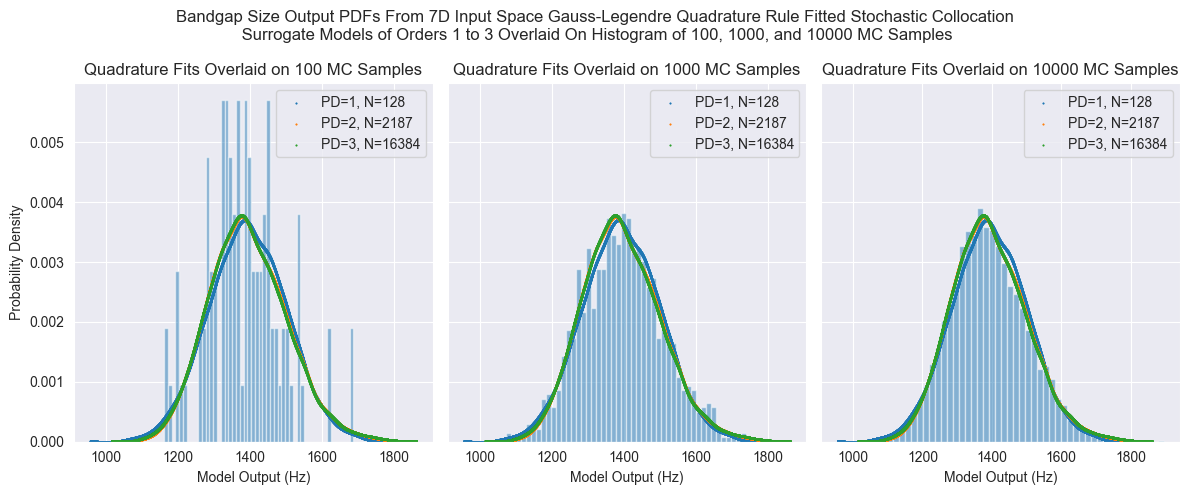

In [36]:
# Plot surrogate model performance
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))

# Plot histograms of random samples for comparision with surrogate model
axs[0].hist(bg_size_MC_sets[100], bins=50, density=True, alpha=0.5)
axs[1].hist(bg_size_MC_sets[1000], bins=50, density=True, alpha=0.5)
axs[2].hist(bg_size_MC_sets[10000], bins=50, density=True, alpha=0.5)

# Plot surrogate model pdfs
for d in degrees:
    plot_label = 'PD='+str(d)+', N='+str(len(bg_size_sample_sets[d]))#+str((d+1)**7)
    axs[0].scatter(np.linspace(np.min(surrogate_outputs[d]), np.max(surrogate_outputs[d]), N_test), surrogate_pdf[d], label=plot_label, s=1, linewidths=0.5)
    axs[1].scatter(np.linspace(np.min(surrogate_outputs[d]), np.max(surrogate_outputs[d]), N_test), surrogate_pdf[d], label=plot_label, s=1, linewidths=0.5)
    axs[2].scatter(np.linspace(np.min(surrogate_outputs[d]), np.max(surrogate_outputs[d]), N_test), surrogate_pdf[d], label=plot_label, s=1, linewidths=0.5)

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('Quadrature Fits Overlaid on 100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('Quadrature Fits Overlaid on 1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('Quadrature Fits Overlaid on 10000 MC Samples')

title_str = 'Bandgap Size Output PDFs From 7D Input Space Gauss-Legendre Quadrature Rule Fitted Stochastic Collocation\n Surrogate Models of Orders '+str(np.min(degrees))+' to '+str(np.max(degrees))+' Overlaid On Histogram of 100, 1000, and 10000 MC Samples'
fig.suptitle(title_str)

Quadrature fits on bandgap top

In [37]:
### FIT SURROGATE MODELS - QUADRATURE RULE - BANDGAP TOP ###
q_surrogates_bgt = {}
for degree in degrees:
    polynomial_basis = cp.expansion.stieltjes(
        order=degree,
        dist=joint_dist_trunc,
        normed=True
    )
    polynomial_approximation = cp.fit_quadrature(
        orth=polynomial_basis,
        nodes=quadrature_nodes[degree],
        weights=quadrature_weights[degree],
        solves=bg_top_sample_sets[degree]
    )
    q_surrogates_bgt[degree] = polynomial_approximation

In [38]:
### SYNTHESIZE NEW DATAPOINTS WITH SURROGATE MODELS ###
N_test_bgt = 10000
joint_test_bgt = joint_dist_trunc.sample(N_test_bgt)
print(joint_test_bgt.shape)
#print(joint_test_bgt[0])
surrogate_outputs_bgt = {}
surrogate_kdes_bgt = {}
surrogate_pdf_bgt = {}
for degree in degrees:
    surrogate_model = q_surrogates_bgt[degree]
    #print(type(surrogate_model))
    #print(surrogate_model)
    #surrogate_outputs_bgt[degree] = surrogate_model.__call__(joint_test_bgt).astype(float)
    surrogate_outputs_bgt[degree] = surrogate_model(
        q0=joint_test_bgt[0,:], q1=joint_test_bgt[1,:],
        q2=joint_test_bgt[2,:], q3=joint_test_bgt[3,:],
        q4=joint_test_bgt[4,:], q5=joint_test_bgt[5,:], q6=joint_test_bgt[6,:])
    #print(surrogate_outputs_bgt[degree])
    surrogate_kdes_bgt[degree] = gaussian_kde(surrogate_outputs_bgt[degree])
    surrogate_pdf_bgt[degree] = surrogate_kdes_bgt[degree](np.linspace(np.min(surrogate_outputs_bgt[degree]), np.max(surrogate_outputs_bgt[degree]), N_test_bgt))

    # Save surrogate model outputs and KDEs
    save_folder = 'gaussian 6+1 inputs quadrature rule sparse study'
    savemat(save_folder+'/surrogate_outputs_q_bgt_pd_'+str(degree)+'.mat', {'pd_'+str(degree)+'_outputs': surrogate_outputs_bgt[degree]})
    savemat(save_folder+'/surrogate_kdes_q_bgt_pd_'+str(degree)+'.mat', {'pd_'+str(degree)+'_kdes': surrogate_kdes_bgt[degree]})


(7, 10000)


Text(0.5, 0.98, 'Bandgap Top Output PDFs From 7D Input Space Gauss-Legendre Quadrature Rule Fitted Stochastic Collocation\n Surrogate Models of Orders 1 to 3 Overlaid On Histogram of 100, 1000, and 10000 MC Samples')

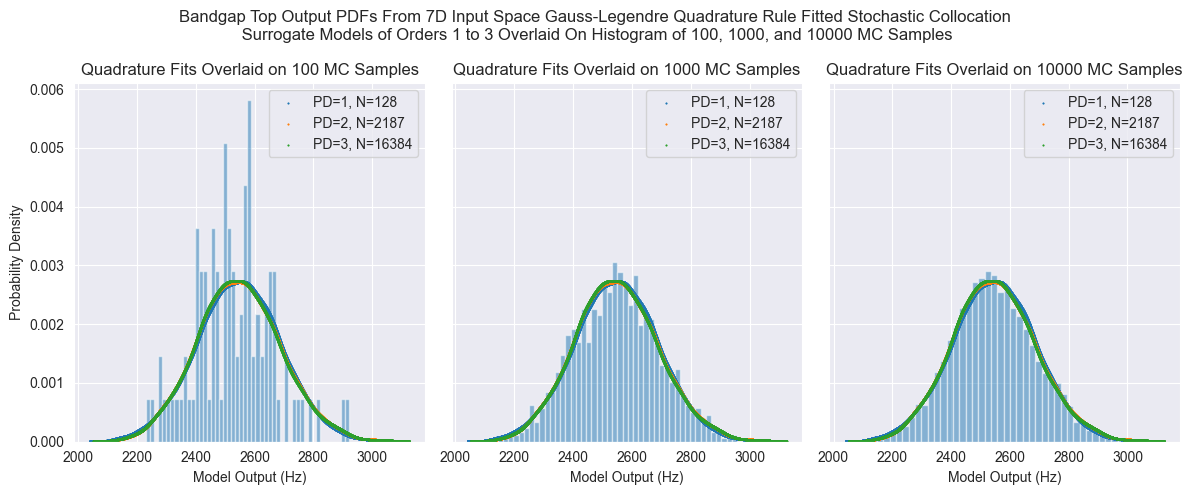

In [40]:
# Plot surrogate model performance
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))

# Plot histograms of random samples for comparision with surrogate model
axs[0].hist(bg_top_MC_sets[100], bins=50, density=True, alpha=0.5)
axs[1].hist(bg_top_MC_sets[1000], bins=50, density=True, alpha=0.5)
axs[2].hist(bg_top_MC_sets[10000], bins=50, density=True, alpha=0.5)

# Plot surrogate model pdfs
for d in degrees:
    plot_label = 'PD='+str(d)+', N='+str(len(bg_size_sample_sets[d]))#+str((d+1)**7)
    axs[0].scatter(np.linspace(np.min(surrogate_outputs_bgt[d]), np.max(surrogate_outputs_bgt[d]), N_test_bgt), surrogate_pdf_bgt[d], label=plot_label, s=1, linewidths=0.5)
    axs[1].scatter(np.linspace(np.min(surrogate_outputs_bgt[d]), np.max(surrogate_outputs_bgt[d]), N_test_bgt), surrogate_pdf_bgt[d], label=plot_label, s=1, linewidths=0.5)
    axs[2].scatter(np.linspace(np.min(surrogate_outputs_bgt[d]), np.max(surrogate_outputs_bgt[d]), N_test_bgt), surrogate_pdf_bgt[d], label=plot_label, s=1, linewidths=0.5)

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('Quadrature Fits Overlaid on 100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('Quadrature Fits Overlaid on 1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('Quadrature Fits Overlaid on 10000 MC Samples')

title_str = 'Bandgap Top Output PDFs From 7D Input Space Gauss-Legendre Quadrature Rule Fitted Stochastic Collocation\n Surrogate Models of Orders '+str(np.min(degrees))+' to '+str(np.max(degrees))+' Overlaid On Histogram of 100, 1000, and 10000 MC Samples'
fig.suptitle(title_str)

Quadrature fits on bandgap bottom

In [41]:
### FIT SURROGATE MODELS - QUADRATURE RULE - BANDGAP BOTTOM ###
q_surrogates_bgb = {}
for degree in degrees:
    polynomial_basis = cp.expansion.stieltjes(
        order=degree,
        dist=joint_dist_trunc,
        normed=True
    )
    polynomial_approximation = cp.fit_quadrature(
        orth=polynomial_basis,
        nodes=quadrature_nodes[degree],
        weights=quadrature_weights[degree],
        solves=bg_bottom_sample_sets[degree]
    )
    q_surrogates_bgb[degree] = polynomial_approximation

In [42]:
### SYNTHESIZE NEW DATAPOINTS WITH SURROGATE MODELS ###
N_test_bgb = 10000
joint_test_bgb = joint_dist_trunc.sample(N_test_bgb)
print(joint_test_bgb.shape)
#print(joint_test_bgb[0])
surrogate_outputs_bgb = {}
surrogate_kdes_bgb = {}
surrogate_pdf_bgb = {}
for degree in degrees:
    surrogate_model = q_surrogates_bgb[degree]
    #print(type(surrogate_model))
    #print(surrogate_model)
    #surrogate_outputs_bgb[degree] = surrogate_model.__call__(joint_test_bgb).astype(float)
    surrogate_outputs_bgb[degree] = surrogate_model(
        q0=joint_test_bgb[0,:], q1=joint_test_bgb[1,:],
        q2=joint_test_bgb[2,:], q3=joint_test_bgb[3,:],
        q4=joint_test_bgb[4,:], q5=joint_test_bgb[5,:], q6=joint_test_bgb[6,:])
    #print(surrogate_outputs_bgb[degree])
    surrogate_kdes_bgb[degree] = gaussian_kde(surrogate_outputs_bgb[degree])
    surrogate_pdf_bgb[degree] = surrogate_kdes_bgb[degree](np.linspace(np.min(surrogate_outputs_bgb[degree]), np.max(surrogate_outputs_bgb[degree]), N_test_bgb))

    # Save surrogate model outputs and KDEs
    save_folder = 'gaussian 6+1 inputs quadrature rule sparse study'
    savemat(save_folder+'/surrogate_outputs_q_bgb_pd_'+str(degree)+'.mat', {'pd_'+str(degree)+'_outputs': surrogate_outputs_bgb[degree]})
    savemat(save_folder+'/surrogate_kdes_q_bgb_pd_'+str(degree)+'.mat', {'pd_'+str(degree)+'_kdes': surrogate_kdes_bgb[degree]})


(7, 10000)


Text(0.5, 0.98, 'Bandgap Bottom Output PDFs From 7D Input Space Gauss-Legendre Quadrature Rule Fitted Stochastic Collocation\n Surrogate Models of Orders 1 to 3 Overlaid On Histogram of 100, 1000, and 10000 MC Samples')

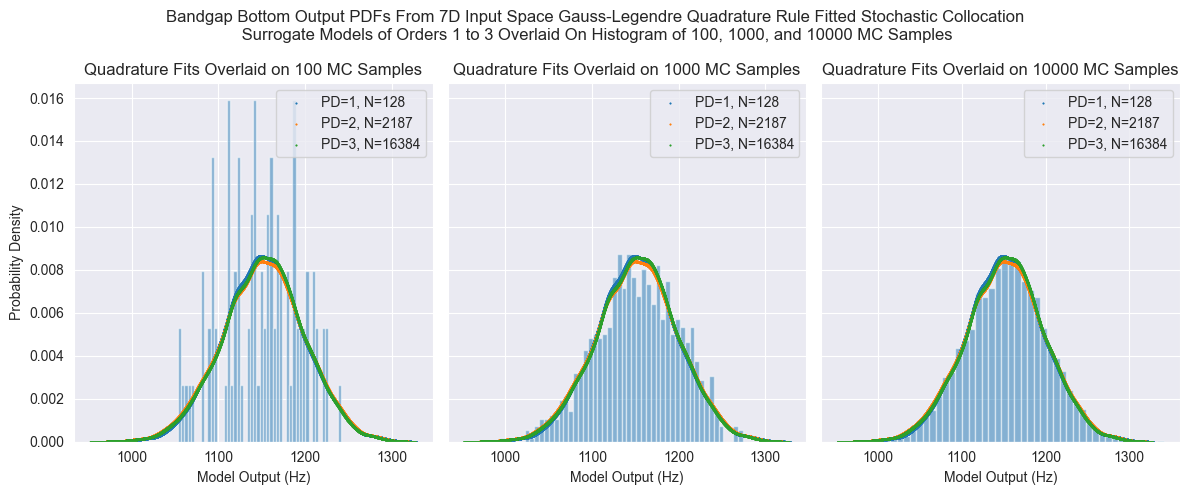

In [43]:
# Plot surrogate model performance
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))

# Plot histograms of random samples for comparision with surrogate model
axs[0].hist(bg_bottom_MC_sets[100], bins=50, density=True, alpha=0.5)
axs[1].hist(bg_bottom_MC_sets[1000], bins=50, density=True, alpha=0.5)
axs[2].hist(bg_bottom_MC_sets[10000], bins=50, density=True, alpha=0.5)

# Plot surrogate model pdfs
for d in degrees:
    plot_label = 'PD='+str(d)+', N='+str(len(bg_size_sample_sets[d]))#+str((d+1)**7)
    axs[0].scatter(np.linspace(np.min(surrogate_outputs_bgb[d]), np.max(surrogate_outputs_bgb[d]), N_test_bgb), surrogate_pdf_bgb[d], label=plot_label, s=1, linewidths=0.5)
    axs[1].scatter(np.linspace(np.min(surrogate_outputs_bgb[d]), np.max(surrogate_outputs_bgb[d]), N_test_bgb), surrogate_pdf_bgb[d], label=plot_label, s=1, linewidths=0.5)
    axs[2].scatter(np.linspace(np.min(surrogate_outputs_bgb[d]), np.max(surrogate_outputs_bgb[d]), N_test_bgb), surrogate_pdf_bgb[d], label=plot_label, s=1, linewidths=0.5)

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('Quadrature Fits Overlaid on 100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('Quadrature Fits Overlaid on 1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('Quadrature Fits Overlaid on 10000 MC Samples')

title_str = 'Bandgap Bottom Output PDFs From 7D Input Space Gauss-Legendre Quadrature Rule Fitted Stochastic Collocation\n Surrogate Models of Orders '+str(np.min(degrees))+' to '+str(np.max(degrees))+' Overlaid On Histogram of 100, 1000, and 10000 MC Samples'
fig.suptitle(title_str)

Quadrature fits on bandgap center

In [44]:
### FIT SURROGATE MODELS - QUADRATURE RULE - BANDGAP CENTER ###
q_surrogates_bgc = {}

for degree in degrees:
    polynomial_basis = cp.expansion.stieltjes(
        order=degree,
        dist=joint_dist_trunc,
        normed=True
    )
    polynomial_approximation = cp.fit_quadrature(
        orth=polynomial_basis,
        nodes=quadrature_nodes[degree],
        weights=quadrature_weights[degree],
        solves=bg_center_sample_sets[degree]
    )
    q_surrogates_bgc[degree] = polynomial_approximation

In [45]:
### SYNTHESIZE NEW DATAPOINTS WITH SURROGATE MODELS ###
N_test_bgc = 10000
joint_test_bgc = joint_dist_trunc.sample(N_test_bgc)
print(joint_test_bgc.shape)
#print(joint_test_bgc[0])
surrogate_outputs_bgc = {}
surrogate_kdes_bgc = {}
surrogate_pdf_bgc = {}
for degree in degrees:
    surrogate_model = q_surrogates_bgc[degree]
    #print(type(surrogate_model))
    #print(surrogate_model)
    #surrogate_outputs_bgc[degree] = surrogate_model.__call__(joint_test_bgc).astype(float)
    surrogate_outputs_bgc[degree] = surrogate_model(
        q0=joint_test_bgc[0,:], q1=joint_test_bgc[1,:],
        q2=joint_test_bgc[2,:], q3=joint_test_bgc[3,:],
        q4=joint_test_bgc[4,:], q5=joint_test_bgc[5,:], q6=joint_test_bgc[6,:])
    #print(surrogate_outputs_bgc[degree])
    surrogate_kdes_bgc[degree] = gaussian_kde(surrogate_outputs_bgc[degree])
    surrogate_pdf_bgc[degree] = surrogate_kdes_bgc[degree](np.linspace(np.min(surrogate_outputs_bgc[degree]), np.max(surrogate_outputs_bgc[degree]), N_test_bgc))

    # Save surrogate model outputs and KDEs
    save_folder = 'gaussian 6+1 inputs quadrature rule sparse study'
    savemat(save_folder+'/surrogate_outputs_q_bgc_pd_'+str(degree)+'.mat', {'pd_'+str(degree)+'_outputs': surrogate_outputs_bgc[degree]})
    savemat(save_folder+'/surrogate_kdes_q_bgc_pd_'+str(degree)+'.mat', {'pd_'+str(degree)+'_kdes': surrogate_kdes_bgc[degree]})


(7, 10000)


Text(0.5, 0.98, 'Bandgap Center Output PDFs From 7D Input Space Gauss-Legendre Quadrature Rule Fitted Stochastic Collocation\n Surrogate Models of Orders 1 to 3 Overlaid On Histogram of 100, 1000, and 10000 MC Samples')

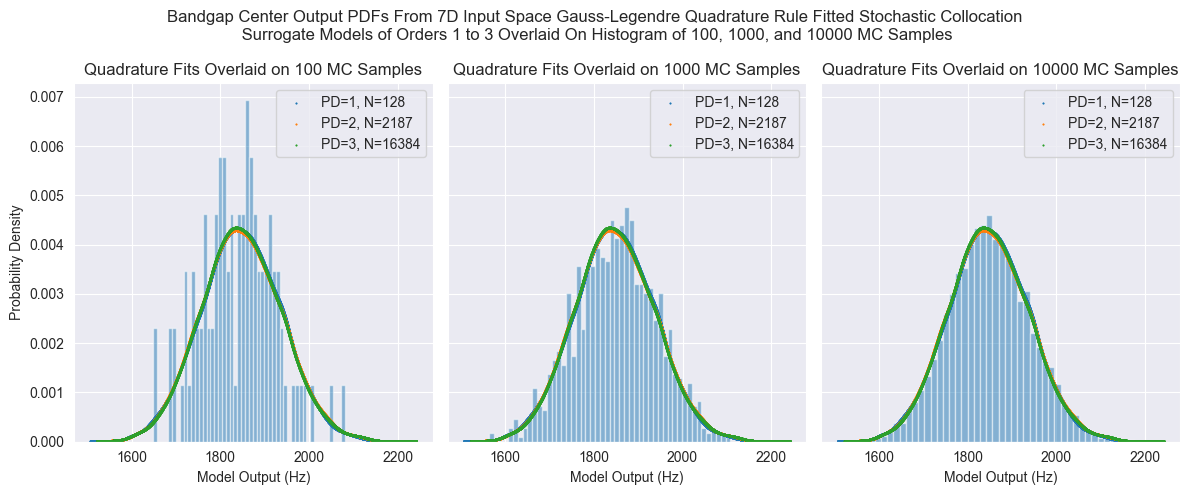

In [46]:
# Plot surrogate model performance
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))

# Plot histograms of random samples for comparision with surrogate model
axs[0].hist(bg_center_MC_sets[100], bins=50, density=True, alpha=0.5)
axs[1].hist(bg_center_MC_sets[1000], bins=50, density=True, alpha=0.5)
axs[2].hist(bg_center_MC_sets[10000], bins=50, density=True, alpha=0.5)

# Plot surrogate model pdfs
for d in degrees:
    plot_label = 'PD='+str(d)+', N='+str(len(bg_size_sample_sets[d]))#+str((d+1)**7)
    axs[0].scatter(np.linspace(np.min(surrogate_outputs_bgc[d]), np.max(surrogate_outputs_bgc[d]), N_test_bgc), surrogate_pdf_bgc[d], label=plot_label, s=1, linewidths=0.5)
    axs[1].scatter(np.linspace(np.min(surrogate_outputs_bgc[d]), np.max(surrogate_outputs_bgc[d]), N_test_bgc), surrogate_pdf_bgc[d], label=plot_label, s=1, linewidths=0.5)
    axs[2].scatter(np.linspace(np.min(surrogate_outputs_bgc[d]), np.max(surrogate_outputs_bgc[d]), N_test_bgc), surrogate_pdf_bgc[d], label=plot_label, s=1, linewidths=0.5)

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('Quadrature Fits Overlaid on 100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('Quadrature Fits Overlaid on 1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('Quadrature Fits Overlaid on 10000 MC Samples')

title_str = 'Bandgap Center Output PDFs From 7D Input Space Gauss-Legendre Quadrature Rule Fitted Stochastic Collocation\n Surrogate Models of Orders '+str(np.min(degrees))+' to '+str(np.max(degrees))+' Overlaid On Histogram of 100, 1000, and 10000 MC Samples'
fig.suptitle(title_str)

Alternative Graphs

Text(0.5, 0.98, "Histograms of 100, 1000, & 10000 MC Samples' Computed Bandgap Top, Bottom,\n and Center Locations For 7D Input Space, Gaussian Distributions")

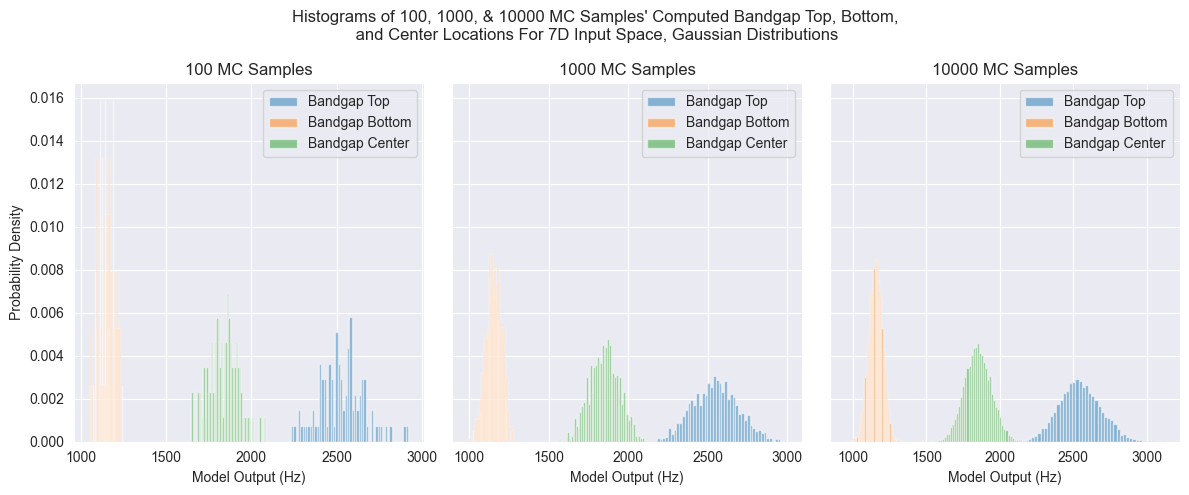

In [28]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))
axs[0].hist(bg_top_MC_sets[100], bins=50, density=True, alpha=0.5, label='Bandgap Top')
axs[1].hist(bg_top_MC_sets[1000], bins=50, density=True, alpha=0.5, label='Bandgap Top')
axs[2].hist(bg_top_MC_sets[10000], bins=50, density=True, alpha=0.5, label='Bandgap Top')
axs[0].hist(bg_bottom_MC_sets[100], bins=50, density=True, alpha=0.5, label='Bandgap Bottom')
axs[1].hist(bg_bottom_MC_sets[1000], bins=50, density=True, alpha=0.5, label='Bandgap Bottom')
axs[2].hist(bg_bottom_MC_sets[10000], bins=50, density=True, alpha=0.5, label='Bandgap Bottom')
axs[0].hist(bg_center_MC_sets[100], bins=50, density=True, alpha=0.5, label='Bandgap Center')
axs[1].hist(bg_center_MC_sets[1000], bins=50, density=True, alpha=0.5, label='Bandgap Center')
axs[2].hist(bg_center_MC_sets[10000], bins=50, density=True, alpha=0.5, label='Bandgap Center')
# axs[0].hist(bg_size_MC_sets[100], bins=50, density=True, alpha=0.5)
# axs[1].hist(bg_size_MC_sets[1000], bins=50, density=True, alpha=0.5)
# axs[2].hist(bg_size_MC_sets[10000], bins=50, density=True, alpha=0.5)

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('10000 MC Samples')

title_str = 'Histograms of 100, 1000, & 10000 MC Samples\' Computed Bandgap Top, Bottom,\n and Center Locations For 7D Input Space, Gaussian Distributions'
fig.suptitle(title_str)


Text(0.5, 0.98, "Histograms of 100, 1000, & 10000 MC Samples' Computed Bandgap Top and Bottom Locations\n and Bandgap Size For 7D Input Space, Gaussian Distributions")

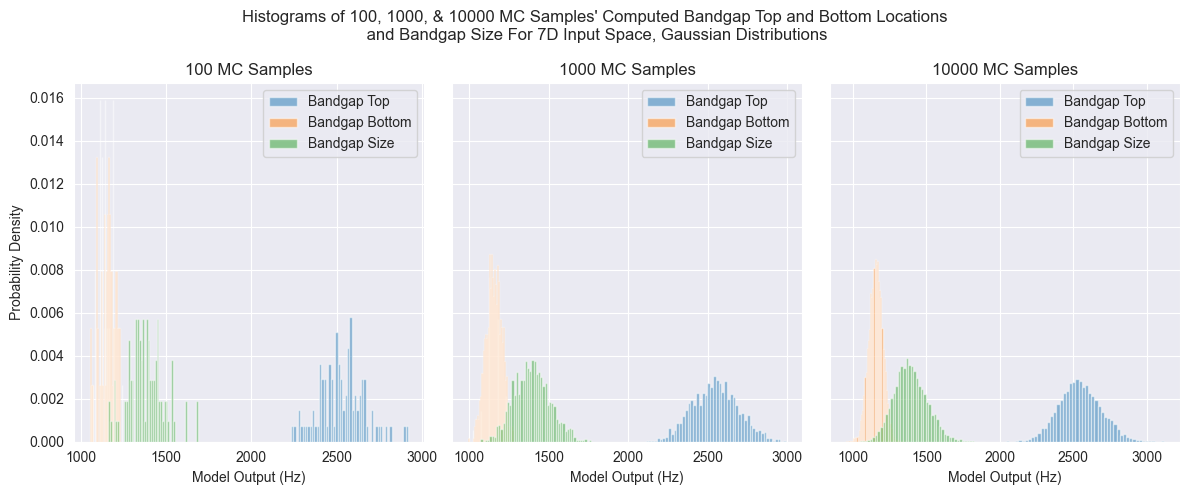

In [29]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))
axs[0].hist(bg_top_MC_sets[100], bins=50, density=True, alpha=0.5, label='Bandgap Top')
axs[1].hist(bg_top_MC_sets[1000], bins=50, density=True, alpha=0.5, label='Bandgap Top')
axs[2].hist(bg_top_MC_sets[10000], bins=50, density=True, alpha=0.5, label='Bandgap Top')
axs[0].hist(bg_bottom_MC_sets[100], bins=50, density=True, alpha=0.5, label='Bandgap Bottom')
axs[1].hist(bg_bottom_MC_sets[1000], bins=50, density=True, alpha=0.5, label='Bandgap Bottom')
axs[2].hist(bg_bottom_MC_sets[10000], bins=50, density=True, alpha=0.5, label='Bandgap Bottom')
axs[0].hist(bg_size_MC_sets[100], bins=50, density=True, alpha=0.5, label='Bandgap Size')
axs[1].hist(bg_size_MC_sets[1000], bins=50, density=True, alpha=0.5, label='Bandgap Size')
axs[2].hist(bg_size_MC_sets[10000], bins=50, density=True, alpha=0.5, label='Bandgap Size')

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('10000 MC Samples')

title_str = 'Histograms of 100, 1000, & 10000 MC Samples\' Computed Bandgap Top and Bottom Locations\n and Bandgap Size For 7D Input Space, Gaussian Distributions'
fig.suptitle(title_str)

Text(0.5, 0.98, "Histograms of 100, 1000, & 10000 MC Samples' Computed Bandgap Top\n and Bottom Locations For 7D Input Space, Gaussian Distributions")

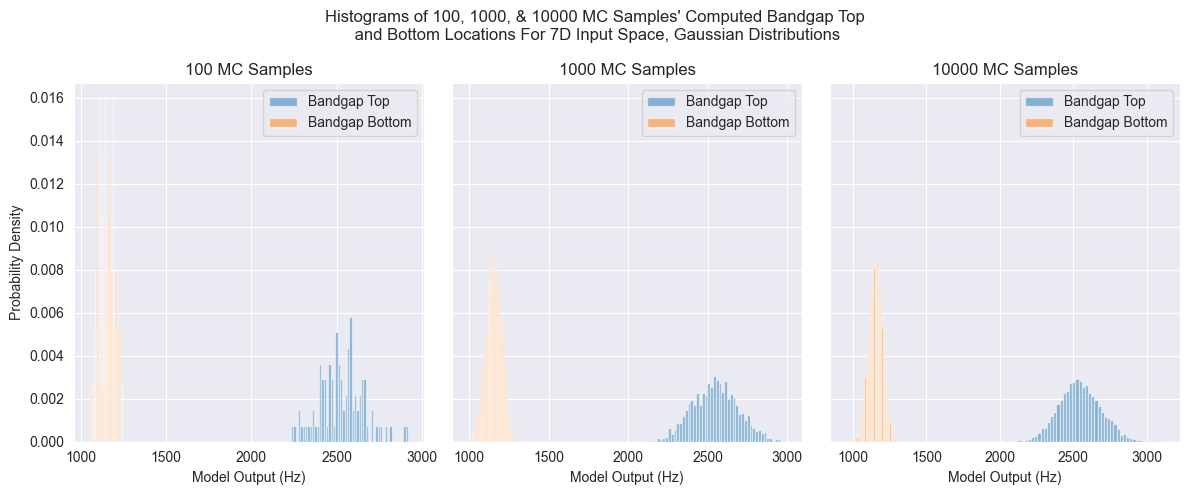

In [30]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))
axs[0].hist(bg_top_MC_sets[100], bins=50, density=True, alpha=0.5, label='Bandgap Top')
axs[1].hist(bg_top_MC_sets[1000], bins=50, density=True, alpha=0.5, label='Bandgap Top')
axs[2].hist(bg_top_MC_sets[10000], bins=50, density=True, alpha=0.5, label='Bandgap Top')
axs[0].hist(bg_bottom_MC_sets[100], bins=50, density=True, alpha=0.5, label='Bandgap Bottom')
axs[1].hist(bg_bottom_MC_sets[1000], bins=50, density=True, alpha=0.5, label='Bandgap Bottom')
axs[2].hist(bg_bottom_MC_sets[10000], bins=50, density=True, alpha=0.5, label='Bandgap Bottom')

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('10000 MC Samples')

title_str = 'Histograms of 100, 1000, & 10000 MC Samples\' Computed Bandgap Top\n and Bottom Locations For 7D Input Space, Gaussian Distributions'
fig.suptitle(title_str)

Text(0.5, 0.98, 'Histograms of 100 MC Samples Of 6D Input Space')

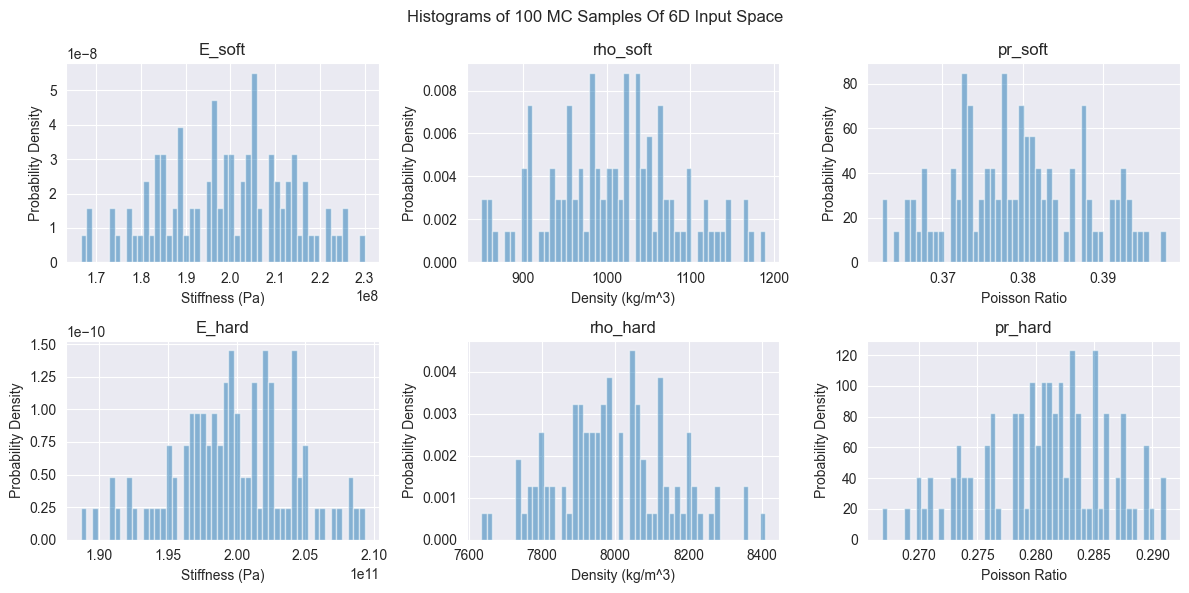

In [31]:
fig, axs = plt.subplots(nrows=2, ncols=3, tight_layout=True, figsize=(12,6))
axs[0,0].hist(E_soft_MC_sets[100], bins=50, density=True, alpha=0.5, label='E Soft')
axs[0,1].hist(rho_soft_MC_sets[100], bins=50, density=True, alpha=0.5, label='Rho Soft')
axs[0,2].hist(pr_soft_MC_sets[100], bins=50, density=True, alpha=0.5, label='Poisson Ratio Soft')
axs[1,0].hist(E_hard_MC_sets[100], bins=50, density=True, alpha=0.5, label='E Hard')
axs[1,1].hist(rho_hard_MC_sets[100], bins=50, density=True, alpha=0.5, label='Rho Hard')
axs[1,2].hist(pr_hard_MC_sets[100], bins=50, density=True, alpha=0.5, label='Poisson Ratio Hard')

axs[0,0].set_xlabel("Stiffness (Pa)")
axs[0,0].set_ylabel("Probability Density")
axs[0,0].set_title('E_soft')

axs[0,1].set_xlabel("Density (kg/m^3)")
axs[0,1].set_ylabel("Probability Density")
axs[0,1].set_title('rho_soft')

axs[0,2].set_xlabel("Poisson Ratio")
axs[0,2].set_ylabel("Probability Density")
axs[0,2].set_title('pr_soft')

axs[1,0].set_xlabel("Stiffness (Pa)")
axs[1,0].set_ylabel("Probability Density")
axs[1,0].set_title('E_hard')

axs[1,1].set_xlabel("Density (kg/m^3)")
axs[1,1].set_ylabel("Probability Density")
axs[1,1].set_title('rho_hard')

axs[1,2].set_xlabel("Poisson Ratio")
axs[1,2].set_ylabel("Probability Density")
axs[1,2].set_title('pr_hard')

title_str = 'Histograms of 100 MC Samples Of 6D Input Space'
fig.suptitle(title_str)

Text(0.5, 0.98, 'Histograms of 1000 MC Samples Of 6D Input Space')

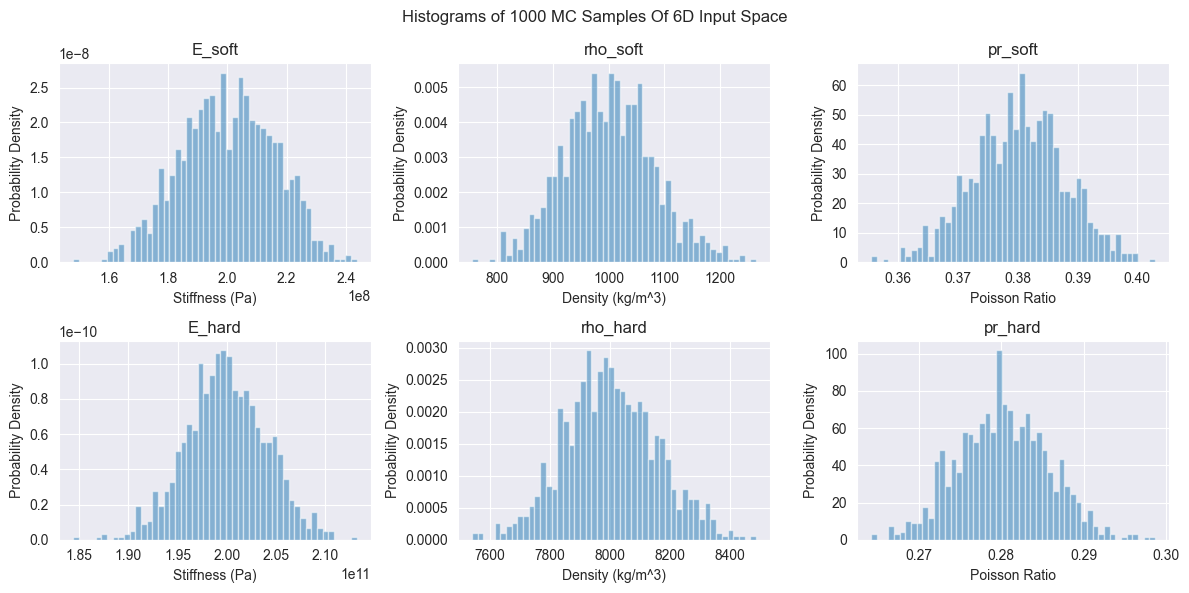

In [32]:
fig, axs = plt.subplots(nrows=2, ncols=3, tight_layout=True, figsize=(12,6))
axs[0,0].hist(E_soft_MC_sets[1000], bins=50, density=True, alpha=0.5, label='E Soft')
axs[0,1].hist(rho_soft_MC_sets[1000], bins=50, density=True, alpha=0.5, label='Rho Soft')
axs[0,2].hist(pr_soft_MC_sets[1000], bins=50, density=True, alpha=0.5, label='Poisson Ratio Soft')
axs[1,0].hist(E_hard_MC_sets[1000], bins=50, density=True, alpha=0.5, label='E Hard')
axs[1,1].hist(rho_hard_MC_sets[1000], bins=50, density=True, alpha=0.5, label='Rho Hard')
axs[1,2].hist(pr_hard_MC_sets[1000], bins=50, density=True, alpha=0.5, label='Poisson Ratio Hard')

axs[0,0].set_xlabel("Stiffness (Pa)")
axs[0,0].set_ylabel("Probability Density")
axs[0,0].set_title('E_soft')

axs[0,1].set_xlabel("Density (kg/m^3)")
axs[0,1].set_ylabel("Probability Density")
axs[0,1].set_title('rho_soft')

axs[0,2].set_xlabel("Poisson Ratio")
axs[0,2].set_ylabel("Probability Density")
axs[0,2].set_title('pr_soft')

axs[1,0].set_xlabel("Stiffness (Pa)")
axs[1,0].set_ylabel("Probability Density")
axs[1,0].set_title('E_hard')

axs[1,1].set_xlabel("Density (kg/m^3)")
axs[1,1].set_ylabel("Probability Density")
axs[1,1].set_title('rho_hard')

axs[1,2].set_xlabel("Poisson Ratio")
axs[1,2].set_ylabel("Probability Density")
axs[1,2].set_title('pr_hard')

title_str = 'Histograms of 1000 MC Samples Of 6D Input Space'
fig.suptitle(title_str)

Text(0.5, 0.98, 'Histograms of 10000 MC Samples Of 6D Input Space')

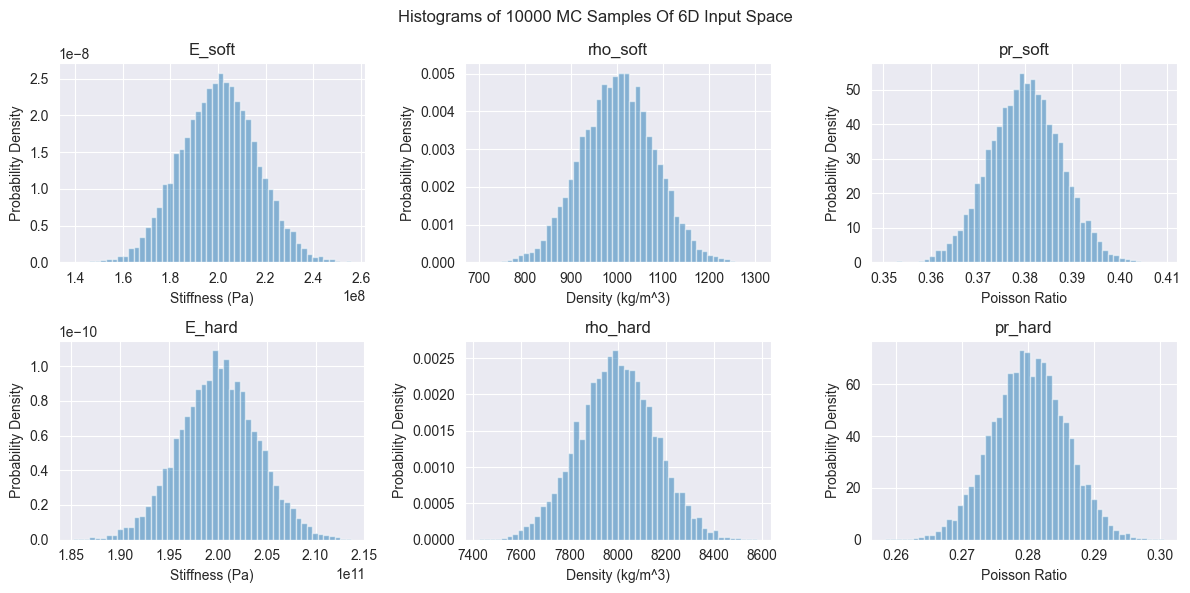

In [33]:
fig, axs = plt.subplots(nrows=2, ncols=3, tight_layout=True, figsize=(12,6))
axs[0,0].hist(E_soft_MC_sets[10000], bins=50, density=True, alpha=0.5, label='E Soft')
axs[0,1].hist(rho_soft_MC_sets[10000], bins=50, density=True, alpha=0.5, label='Rho Soft')
axs[0,2].hist(pr_soft_MC_sets[10000], bins=50, density=True, alpha=0.5, label='Poisson Ratio Soft')
axs[1,0].hist(E_hard_MC_sets[10000], bins=50, density=True, alpha=0.5, label='E Hard')
axs[1,1].hist(rho_hard_MC_sets[10000], bins=50, density=True, alpha=0.5, label='Rho Hard')
axs[1,2].hist(pr_hard_MC_sets[10000], bins=50, density=True, alpha=0.5, label='Poisson Ratio Hard')

axs[0,0].set_xlabel("Stiffness (Pa)")
axs[0,0].set_ylabel("Probability Density")
axs[0,0].set_title('E_soft')

axs[0,1].set_xlabel("Density (kg/m^3)")
axs[0,1].set_ylabel("Probability Density")
axs[0,1].set_title('rho_soft')

axs[0,2].set_xlabel("Poisson Ratio")
axs[0,2].set_ylabel("Probability Density")
axs[0,2].set_title('pr_soft')

axs[1,0].set_xlabel("Stiffness (Pa)")
axs[1,0].set_ylabel("Probability Density")
axs[1,0].set_title('E_hard')

axs[1,1].set_xlabel("Density (kg/m^3)")
axs[1,1].set_ylabel("Probability Density")
axs[1,1].set_title('rho_hard')

axs[1,2].set_xlabel("Poisson Ratio")
axs[1,2].set_ylabel("Probability Density")
axs[1,2].set_title('pr_hard')

title_str = 'Histograms of 10000 MC Samples Of 6D Input Space'
fig.suptitle(title_str)

Stochastic Collocation - Sparse Grid - Bandgap Size

In [47]:
### FIT SURROGATE MODELS - SPARSE GRID ###
sg_surrogates_bgs = {}
for degree in sparse_degrees:
    polynomial_basis = cp.expansion.stieltjes(
        order=degree,
        dist=joint_dist_trunc,
        normed=True
    )
    polynomial_approximation = cp.fit_quadrature(
        orth=polynomial_basis,
        nodes=sparse_nodes[degree],
        weights=sparse_weights[degree],
        solves=bg_size_SG_sets[degree]
    )
    sg_surrogates_bgs[degree] = polynomial_approximation

AssertionError: 

In [ ]:
### SYNTHESIZE NEW DATAPOINTS WITH SURROGATE MODELS ###
N_test = 1000
joint_test = joint_dist.sample(N_test)
print(joint_test.shape)
#print(joint_test[0])
surrogate_outputs = {}
surrogate_kdes = {}
surrogate_pdf = {}
for degree in sparse_degrees:
    surrogate_model = sg_surrogates_bgs[degree]
    #print(type(surrogate_model))
    #print(surrogate_model)
    #surrogate_outputs[degree] = surrogate_model.__call__(joint_test).astype(float)
    surrogate_outputs[degree] = surrogate_model(
        q0=joint_test[0,:], q1=joint_test[1,:],
        q2=joint_test[2,:], q3=joint_test[3,:],
        q4=joint_test[4,:], q5=joint_test[5,:], q6=joint_test[6,:])
    #print(surrogate_outputs[degree])
    surrogate_kdes[degree] = gaussian_kde(surrogate_outputs[degree])
    surrogate_pdf[degree] = surrogate_kdes[degree](np.linspace(np.min(surrogate_outputs[degree]), np.max(surrogate_outputs[degree]), 1000))

In [ ]:
plt.style.use('default')
# Plot surrogate model performance
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, tight_layout=True, figsize=(12,5))

# Plot histograms of random samples for comparision with surrogate model
axs[0].hist(bg_size_MC_sets[100], bins=50, density=True, alpha=0.5)
axs[1].hist(bg_size_MC_sets[1000], bins=50, density=True, alpha=0.5)
axs[2].hist(bg_size_MC_sets[10000], bins=50, density=True, alpha=0.5)

# Plot surrogate model pdfs
#for d in sparse_degrees:
for d in [1,2]:

    plot_label = 'PD='+str(d)+', N='+str(len(bg_size_SG_sets[d]))#+str((d+1)**7)
    axs[0].scatter(np.linspace(np.min(surrogate_outputs[d]), np.max(surrogate_outputs[d]), 1000), surrogate_pdf[d], label=plot_label, s=1, linewidths=0.5)
    axs[1].scatter(np.linspace(np.min(surrogate_outputs[d]), np.max(surrogate_outputs[d]), 1000), surrogate_pdf[d], label=plot_label, s=1, linewidths=0.5)
    axs[2].scatter(np.linspace(np.min(surrogate_outputs[d]), np.max(surrogate_outputs[d]), 1000), surrogate_pdf[d], label=plot_label, s=1, linewidths=0.5)

axs[0].set_xlabel("Model Output - Bandgap Size (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('Sparse Grid Fits Overlaid \non 100 MC Samples')

axs[1].set_xlabel("Model Output - Bandgap Size (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('Sparse Grid Fits Overlaid \non 1000 MC Samples')

axs[2].set_xlabel("Model Output - Bandgap Size (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('Sparse Grid Fits Overlaid \non 10000 MC Samples')

title_str = 'Bandgap Size Output PDFs Generated Via Stochastic Collocation With Smolyak Sparse Grid (Gaussian Quadrature Rule) & Stieltjes PCE On 7D Input Space Nodes\n Surrogate Models of Orders '+str(np.min(degrees))+' to '+str(np.max(degrees))+' Are Overlaid On Histograms of 100, 1000, and 10000 Monte Carlo Samples For Comparison'
fig.suptitle(title_str)

Stochastic Collocation - MC Regression - Bandgap Size

In [ ]:
MC_inputs = {}
# MC_inputs[N_MC2] = joint_samples_MC2
# MC_inputs[N_MC3] = joint_samples_MC3
# MC_inputs[N_MC4] = joint_samples_MC4
for n in set_N:
    MC_inputs[n] = np.hstack((
        E_soft_MC_sets[n],
        E_hard_MC_sets[n],
        rho_soft_MC_sets[n],
        rho_hard_MC_sets[n],
        pr_soft_MC_sets[n],
        pr_hard_MC_sets[n],
        geo_fp_MC_sets[n]
    ))

MC_degrees = {}
MC_degrees[N_MC2] = np.array([1,2,3,4])
MC_degrees[N_MC3] = np.array([1,2,3,4])
MC_degrees[N_MC4] = np.array([1,2,3,4])
print(E_soft_MC_sets[100].shape)
print(MC_inputs[N_MC2].shape)
print(MC_inputs[N_MC3].shape)
print(MC_inputs[N_MC4].shape)
print(type(MC_degrees))
print(type(MC_degrees[N_MC2]))

In [ ]:
# r_surrogates_bgs_MC_100 = {}
# for degree in MC_degrees[N_MC2]:
#     polynomial_basis = cp.expansion.stieltjes(
#         order=degree,
#         dist=joint_dist_trunc,
#         normed=True
#     )
#     # print(fit_input.shape)
#     # print(bg_size_MC_sets[100].shape)
#     polynomial_approximation = cp.fit_regression(
#         polynomials=polynomial_basis,
#         abscissas=MC_inputs[N_MC2],
#         evals=bg_size_MC_sets[N_MC2],
#     )
#     r_surrogates_bgs_MC_100[degree] = polynomial_approximation

In [ ]:
### FIT SURROGATE MODELS - MONTE CARLO REGRESSION ###
r_surrogates_bgs = {}
for n in set_N:
    print(n)
    r_surrogates_bgs[n] = {}
    for degree in MC_degrees[n]:
        polynomial_basis = cp.expansion.stieltjes(
            order=degree,
            dist=joint_dist_trunc,
            normed=True
        )
        # print(bg_size_MC_sets[100].shape)
        polynomial_approximation = cp.fit_regression(
            polynomials=polynomial_basis,
            abscissas=MC_inputs[n].T,
            evals=bg_size_MC_sets[n],
        )
        r_surrogates_bgs[n][degree] = polynomial_approximation

In [ ]:
### SYNTHESIZE NEW DATAPOINTS WITH SURROGATE MODELS ###
N_test_mc = 1000
joint_test_mc = joint_dist_trunc.sample(N_test_mc)
#print(joint_test_mc.shape)
#print(joint_test_mc[0])
mc_surrogate_outputs = {}
mc_surrogate_kdes = {}
mc_surrogate_pdf = {}
for n in set_N:
    mc_surrogate_outputs[n] = {}
    mc_surrogate_kdes[n] = {}
    mc_surrogate_pdf[n] = {}

    for degree in MC_degrees[n]:
        mc_surrogate_model = r_surrogates_bgs[n][degree]
        #print(type(mc_surrogate_model))
        #print(mc_surrogate_model)
        mc_surrogate_outputs[n][degree] = mc_surrogate_model(
            q0=joint_test_mc[0,:], q1=joint_test_mc[1,:],
            q2=joint_test_mc[2,:], q3=joint_test_mc[3,:],
            q4=joint_test_mc[4,:], q5=joint_test_mc[5,:], q6=joint_test_mc[6,:])
        #print(mc_surrogate_outputs[n][degree])
        mc_surrogate_kdes[n][degree] = gaussian_kde(mc_surrogate_outputs[n][degree])
        mc_surrogate_pdf[n][degree] = mc_surrogate_kdes[n][degree](np.linspace(np.min(mc_surrogate_outputs[n][degree]), np.max(mc_surrogate_outputs[n][degree]), 1000))

In [ ]:
# Plot surrogate model performance
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))

# Plot histograms of random samples for comparision with surrogate model
axs[0].hist(bg_size_MC_sets[100], bins=50, density=True, alpha=0.5)
axs[1].hist(bg_size_MC_sets[1000], bins=50, density=True, alpha=0.5)
axs[2].hist(bg_size_MC_sets[10000], bins=50, density=True, alpha=0.5)

# Plot surrogate model pdfs
for d in MC_degrees[N_MC2]:
    plot_label = 'PD='+str(d)
    axs[0].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC2][d]), np.max(mc_surrogate_outputs[N_MC2][d]), 1000), mc_surrogate_pdf[N_MC2][d], label=plot_label, s=1, linewidths=0.5)
    axs[1].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC2][d]), np.max(mc_surrogate_outputs[N_MC2][d]), 1000), mc_surrogate_pdf[N_MC2][d], label=plot_label, s=1, linewidths=0.5)
    axs[2].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC2][d]), np.max(mc_surrogate_outputs[N_MC2][d]), 1000), mc_surrogate_pdf[N_MC2][d], label=plot_label, s=1, linewidths=0.5)

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('MC Regression Overlaid on 100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('MC Regression Overlaid on 1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('MC Regression Overlaid on 10000 MC Samples')

title_str = 'Bandgap Size Output PDFs From '+str(N_MC2)+' Monte Carlo Samples Fitted Stochastic Collocation \nSurrogate Models of Orders '+str(np.min(MC_degrees[N_MC2]))+' to '+str(np.max(MC_degrees[N_MC2]))+' Overlaid On Histogram of 100, 1000, and 10000 MC Samples'
fig.suptitle(title_str)

In [ ]:
# Plot surrogate model performance
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, tight_layout=True, figsize=(12,5))

# Plot histograms of random samples for comparision with surrogate model
axs[0].hist(bg_size_MC_sets[100], bins=50, density=True, alpha=0.5)
axs[1].hist(bg_size_MC_sets[1000], bins=50, density=True, alpha=0.5)
axs[2].hist(bg_size_MC_sets[10000], bins=50, density=True, alpha=0.5)

# Plot surrogate model pdfs
for d in MC_degrees[N_MC3]:
    plot_label = 'PD='+str(d)
    axs[0].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC3][d]), np.max(mc_surrogate_outputs[N_MC3][d]), 1000), mc_surrogate_pdf[N_MC3][d], label=plot_label, s=1, linewidths=0.5)
    axs[1].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC3][d]), np.max(mc_surrogate_outputs[N_MC3][d]), 1000), mc_surrogate_pdf[N_MC3][d], label=plot_label, s=1, linewidths=0.5)
    axs[2].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC3][d]), np.max(mc_surrogate_outputs[N_MC3][d]), 1000), mc_surrogate_pdf[N_MC3][d], label=plot_label, s=1, linewidths=0.5)

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('MC Regression Overlaid on 100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('MC Regression Overlaid on 1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('MC Regression Overlaid on 10000 MC Samples')

title_str = 'Bandgap Size Output PDFs From '+str(N_MC3)+' Monte Carlo Samples Fitted Stochastic Collocation \nSurrogate Models of Orders '+str(np.min(MC_degrees[N_MC3]))+' to '+str(np.max(MC_degrees[N_MC3]))+' Overlaid On Histogram of 100, 1000, and 10000 MC Samples'
fig.suptitle(title_str)

In [ ]:
# Plot surrogate model performance
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))

# Plot histograms of random samples for comparision with surrogate model
axs[0].hist(bg_size_MC_sets[100], bins=50, density=True, alpha=0.5)
axs[1].hist(bg_size_MC_sets[1000], bins=50, density=True, alpha=0.5)
axs[2].hist(bg_size_MC_sets[10000], bins=50, density=True, alpha=0.5)

# Plot surrogate model pdfs
for d in MC_degrees[N_MC4]:
    plot_label = 'PD='+str(d)
    axs[0].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC4][d]), np.max(mc_surrogate_outputs[N_MC4][d]), 1000), mc_surrogate_pdf[N_MC4][d], label=plot_label, s=1, linewidths=0.5)
    axs[1].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC4][d]), np.max(mc_surrogate_outputs[N_MC4][d]), 1000), mc_surrogate_pdf[N_MC4][d], label=plot_label, s=1, linewidths=0.5)
    axs[2].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC4][d]), np.max(mc_surrogate_outputs[N_MC4][d]), 1000), mc_surrogate_pdf[N_MC4][d], label=plot_label, s=1, linewidths=0.5)

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('MC Regression Overlaid on 100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('MC Regression Overlaid on 1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('MC Regression Overlaid on 10000 MC Samples')

title_str = 'Bandgap Size Output PDFs From '+str(N_MC4)+' Monte Carlo Samples Fitted Stochastic Collocation \nSurrogate Models of Orders '+str(np.min(MC_degrees[N_MC4]))+' to '+str(np.max(MC_degrees[N_MC4]))+' Overlaid On Histogram of 100, 1000, and 10000 MC Samples'
fig.suptitle(title_str)

Stochastic Collocation - MC Regression - Bandgap Top

In [ ]:
### FIT SURROGATE MODELS - MONTE CARLO REGRESSION ###
r_surrogates_bgt = {}
for n in set_N:
    print(n)
    r_surrogates_bgt[n] = {}
    for degree in MC_degrees[n]:
        polynomial_basis = cp.expansion.stieltjes(
            order=degree,
            dist=joint_dist_trunc,
            normed=True
        )
        # print(bg_size_MC_sets[100].shape)
        polynomial_approximation = cp.fit_regression(
            polynomials=polynomial_basis,
            abscissas=MC_inputs[n].T,
            evals=bg_top_MC_sets[n],
        )
        r_surrogates_bgt[n][degree] = polynomial_approximation

In [ ]:
### SYNTHESIZE NEW DATAPOINTS WITH SURROGATE MODELS ###
N_test_mc = 1000
joint_test_mc = joint_dist_trunc.sample(N_test_mc)
#print(joint_test_mc.shape)
#print(joint_test_mc[0])
mc_surrogate_outputs = {}
mc_surrogate_kdes = {}
mc_surrogate_pdf = {}
for n in set_N:
    mc_surrogate_outputs[n] = {}
    mc_surrogate_kdes[n] = {}
    mc_surrogate_pdf[n] = {}

    for degree in MC_degrees[n]:
        mc_surrogate_model = r_surrogates_bgt[n][degree]
        #print(type(mc_surrogate_model))
        #print(mc_surrogate_model)
        mc_surrogate_outputs[n][degree] = mc_surrogate_model(
            q0=joint_test_mc[0,:], q1=joint_test_mc[1,:],
            q2=joint_test_mc[2,:], q3=joint_test_mc[3,:],
            q4=joint_test_mc[4,:], q5=joint_test_mc[5,:], q6=joint_test_mc[6,:])
        #print(mc_surrogate_outputs[n][degree])
        mc_surrogate_kdes[n][degree] = gaussian_kde(mc_surrogate_outputs[n][degree])
        mc_surrogate_pdf[n][degree] = mc_surrogate_kdes[n][degree](np.linspace(np.min(mc_surrogate_outputs[n][degree]), np.max(mc_surrogate_outputs[n][degree]), 1000))

In [ ]:
# Plot surrogate model performance
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))

# Plot histograms of random samples for comparision with surrogate model
axs[0].hist(bg_top_MC_sets[100], bins=50, density=True, alpha=0.5)
axs[1].hist(bg_top_MC_sets[1000], bins=50, density=True, alpha=0.5)
axs[2].hist(bg_top_MC_sets[10000], bins=50, density=True, alpha=0.5)

# Plot surrogate model pdfs
for d in MC_degrees[N_MC2]:
    plot_label = 'PD='+str(d)
    axs[0].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC2][d]), np.max(mc_surrogate_outputs[N_MC2][d]), 1000), mc_surrogate_pdf[N_MC2][d], label=plot_label, s=1, linewidths=0.5)
    axs[1].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC2][d]), np.max(mc_surrogate_outputs[N_MC2][d]), 1000), mc_surrogate_pdf[N_MC2][d], label=plot_label, s=1, linewidths=0.5)
    axs[2].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC2][d]), np.max(mc_surrogate_outputs[N_MC2][d]), 1000), mc_surrogate_pdf[N_MC2][d], label=plot_label, s=1, linewidths=0.5)

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('MC Regression Overlaid on 100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('MC Regression Overlaid on 1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('MC Regression Overlaid on 10000 MC Samples')

title_str = 'Bandgap Top Output PDFs From '+str(N_MC2)+' Monte Carlo Samples Fitted Stochastic Collocation \nSurrogate Models of Orders '+str(np.min(MC_degrees[N_MC2]))+' to '+str(np.max(MC_degrees[N_MC2]))+' Overlaid On Histogram of 100, 1000, and 10000 MC Samples'
fig.suptitle(title_str)

In [ ]:
# Plot surrogate model performance
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))

# Plot histograms of random samples for comparision with surrogate model
axs[0].hist(bg_top_MC_sets[100], bins=50, density=True, alpha=0.5)
axs[1].hist(bg_top_MC_sets[1000], bins=50, density=True, alpha=0.5)
axs[2].hist(bg_top_MC_sets[10000], bins=50, density=True, alpha=0.5)

# Plot surrogate model pdfs
for d in MC_degrees[N_MC3]:
    plot_label = 'PD='+str(d)
    axs[0].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC3][d]), np.max(mc_surrogate_outputs[N_MC3][d]), 1000), mc_surrogate_pdf[N_MC3][d], label=plot_label, s=1, linewidths=0.5)
    axs[1].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC3][d]), np.max(mc_surrogate_outputs[N_MC3][d]), 1000), mc_surrogate_pdf[N_MC3][d], label=plot_label, s=1, linewidths=0.5)
    axs[2].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC3][d]), np.max(mc_surrogate_outputs[N_MC3][d]), 1000), mc_surrogate_pdf[N_MC3][d], label=plot_label, s=1, linewidths=0.5)

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('MC Regression Overlaid on 100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('MC Regression Overlaid on 1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('MC Regression Overlaid on 10000 MC Samples')

title_str = 'Bandgap Top Output PDFs From '+str(N_MC3)+' Monte Carlo Samples Fitted Stochastic Collocation \nSurrogate Models of Orders '+str(np.min(MC_degrees[N_MC3]))+' to '+str(np.max(MC_degrees[N_MC3]))+' Overlaid On Histogram of 100, 1000, and 10000 MC Samples'
fig.suptitle(title_str)

In [ ]:
# Plot surrogate model performance
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))

# Plot histograms of random samples for comparision with surrogate model
axs[0].hist(bg_top_MC_sets[100], bins=50, density=True, alpha=0.5)
axs[1].hist(bg_top_MC_sets[1000], bins=50, density=True, alpha=0.5)
axs[2].hist(bg_top_MC_sets[10000], bins=50, density=True, alpha=0.5)

# Plot surrogate model pdfs
for d in MC_degrees[N_MC4]:
    plot_label = 'PD='+str(d)
    axs[0].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC4][d]), np.max(mc_surrogate_outputs[N_MC4][d]), 1000), mc_surrogate_pdf[N_MC4][d], label=plot_label, s=1, linewidths=0.5)
    axs[1].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC4][d]), np.max(mc_surrogate_outputs[N_MC4][d]), 1000), mc_surrogate_pdf[N_MC4][d], label=plot_label, s=1, linewidths=0.5)
    axs[2].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC4][d]), np.max(mc_surrogate_outputs[N_MC4][d]), 1000), mc_surrogate_pdf[N_MC4][d], label=plot_label, s=1, linewidths=0.5)

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('MC Regression Overlaid on 100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('MC Regression Overlaid on 1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('MC Regression Overlaid on 10000 MC Samples')

title_str = 'Bandgap Top Output PDFs From '+str(N_MC4)+' Monte Carlo Samples Fitted Stochastic Collocation \nSurrogate Models of Orders '+str(np.min(MC_degrees[N_MC4]))+' to '+str(np.max(MC_degrees[N_MC4]))+' Overlaid On Histogram of 100, 1000, and 10000 MC Samples'
fig.suptitle(title_str)

Stochastic Collocation - MC Regression - Bandgap Bottom


In [ ]:
### FIT SURROGATE MODELS - MONTE CARLO REGRESSION ###
r_surrogates_bgb = {}
for n in set_N:
    print(n)
    r_surrogates_bgb[n] = {}
    for degree in MC_degrees[n]:
        polynomial_basis = cp.expansion.stieltjes(
            order=degree,
            dist=joint_dist_trunc,
            normed=True
        )
        # print(bg_size_MC_sets[100].shape)
        polynomial_approximation = cp.fit_regression(
            polynomials=polynomial_basis,
            abscissas=MC_inputs[n].T,
            evals=bg_bottom_MC_sets[n],
        )
        r_surrogates_bgb[n][degree] = polynomial_approximation

In [ ]:
### SYNTHESIZE NEW DATAPOINTS WITH SURROGATE MODELS ###
N_test_mc = 1000
joint_test_mc = joint_dist_trunc.sample(N_test_mc)
#print(joint_test_mc.shape)
#print(joint_test_mc[0])
mc_surrogate_outputs = {}
mc_surrogate_kdes = {}
mc_surrogate_pdf = {}
for n in set_N:
    mc_surrogate_outputs[n] = {}
    mc_surrogate_kdes[n] = {}
    mc_surrogate_pdf[n] = {}

    for degree in MC_degrees[n]:
        mc_surrogate_model = r_surrogates_bgb[n][degree]
        #print(type(mc_surrogate_model))
        #print(mc_surrogate_model)
        mc_surrogate_outputs[n][degree] = mc_surrogate_model(
            q0=joint_test_mc[0,:], q1=joint_test_mc[1,:],
            q2=joint_test_mc[2,:], q3=joint_test_mc[3,:],
            q4=joint_test_mc[4,:], q5=joint_test_mc[5,:], q6=joint_test_mc[6,:])
        #print(mc_surrogate_outputs[n][degree])
        mc_surrogate_kdes[n][degree] = gaussian_kde(mc_surrogate_outputs[n][degree])
        mc_surrogate_pdf[n][degree] = mc_surrogate_kdes[n][degree](np.linspace(np.min(mc_surrogate_outputs[n][degree]), np.max(mc_surrogate_outputs[n][degree]), 1000))

In [ ]:
# Plot surrogate model performance
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))

# Plot histograms of random samples for comparision with surrogate model
axs[0].hist(bg_bottom_MC_sets[100], bins=50, density=True, alpha=0.5)
axs[1].hist(bg_bottom_MC_sets[1000], bins=50, density=True, alpha=0.5)
axs[2].hist(bg_bottom_MC_sets[10000], bins=50, density=True, alpha=0.5)

# Plot surrogate model pdfs
for d in MC_degrees[N_MC2]:
    plot_label = 'PD='+str(d)
    axs[0].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC2][d]), np.max(mc_surrogate_outputs[N_MC2][d]), 1000), mc_surrogate_pdf[N_MC2][d], label=plot_label, s=1, linewidths=0.5)
    axs[1].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC2][d]), np.max(mc_surrogate_outputs[N_MC2][d]), 1000), mc_surrogate_pdf[N_MC2][d], label=plot_label, s=1, linewidths=0.5)
    axs[2].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC2][d]), np.max(mc_surrogate_outputs[N_MC2][d]), 1000), mc_surrogate_pdf[N_MC2][d], label=plot_label, s=1, linewidths=0.5)

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('MC Regression Overlaid on 100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('MC Regression Overlaid on 1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('MC Regression Overlaid on 10000 MC Samples')

title_str = 'Bandgap Bottom Output PDFs From '+str(N_MC2)+' Monte Carlo Samples Fitted Stochastic Collocation \nSurrogate Models of Orders '+str(np.min(MC_degrees[N_MC2]))+' to '+str(np.max(MC_degrees[N_MC2]))+' Overlaid On Histogram of 100, 1000, and 10000 MC Samples'
fig.suptitle(title_str)

In [ ]:
# Plot surrogate model performance
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))

# Plot histograms of random samples for comparision with surrogate model
axs[0].hist(bg_bottom_MC_sets[100], bins=50, density=True, alpha=0.5)
axs[1].hist(bg_bottom_MC_sets[1000], bins=50, density=True, alpha=0.5)
axs[2].hist(bg_bottom_MC_sets[10000], bins=50, density=True, alpha=0.5)

# Plot surrogate model pdfs
for d in MC_degrees[N_MC3]:
    plot_label = 'PD='+str(d)
    axs[0].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC3][d]), np.max(mc_surrogate_outputs[N_MC3][d]), 1000), mc_surrogate_pdf[N_MC3][d], label=plot_label, s=1, linewidths=0.5)
    axs[1].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC3][d]), np.max(mc_surrogate_outputs[N_MC3][d]), 1000), mc_surrogate_pdf[N_MC3][d], label=plot_label, s=1, linewidths=0.5)
    axs[2].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC3][d]), np.max(mc_surrogate_outputs[N_MC3][d]), 1000), mc_surrogate_pdf[N_MC3][d], label=plot_label, s=1, linewidths=0.5)

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('MC Regression Overlaid on 100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('MC Regression Overlaid on 1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('MC Regression Overlaid on 10000 MC Samples')

title_str = 'Bandgap Bottom Output PDFs From '+str(N_MC3)+' Monte Carlo Samples Fitted Stochastic Collocation \nSurrogate Models of Orders '+str(np.min(MC_degrees[N_MC3]))+' to '+str(np.max(MC_degrees[N_MC3]))+' Overlaid On Histogram of 100, 1000, and 10000 MC Samples'
fig.suptitle(title_str)

In [ ]:
# Plot surrogate model performance
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))

# Plot histograms of random samples for comparision with surrogate model
axs[0].hist(bg_bottom_MC_sets[100], bins=50, density=True, alpha=0.5)
axs[1].hist(bg_bottom_MC_sets[1000], bins=50, density=True, alpha=0.5)
axs[2].hist(bg_bottom_MC_sets[10000], bins=50, density=True, alpha=0.5)

# Plot surrogate model pdfs
for d in MC_degrees[N_MC4]:
    plot_label = 'PD='+str(d)
    axs[0].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC4][d]), np.max(mc_surrogate_outputs[N_MC4][d]), 1000), mc_surrogate_pdf[N_MC4][d], label=plot_label, s=1, linewidths=0.5)
    axs[1].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC4][d]), np.max(mc_surrogate_outputs[N_MC4][d]), 1000), mc_surrogate_pdf[N_MC4][d], label=plot_label, s=1, linewidths=0.5)
    axs[2].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC4][d]), np.max(mc_surrogate_outputs[N_MC4][d]), 1000), mc_surrogate_pdf[N_MC4][d], label=plot_label, s=1, linewidths=0.5)

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('MC Regression Overlaid on 100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('MC Regression Overlaid on 1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('MC Regression Overlaid on 10000 MC Samples')

title_str = 'Bandgap Bottom Output PDFs From '+str(N_MC4)+' Monte Carlo Samples Fitted Stochastic Collocation \nSurrogate Models of Orders '+str(np.min(MC_degrees[N_MC4]))+' to '+str(np.max(MC_degrees[N_MC4]))+' Overlaid On Histogram of 100, 1000, and 10000 MC Samples'
fig.suptitle(title_str)

Stochastic Collocation - MC Regression - Bandgap Center

In [ ]:
### FIT SURROGATE MODELS - MONTE CARLO REGRESSION ###
r_surrogates_bgc = {}
for n in set_N:
    print(n)
    r_surrogates_bgc[n] = {}
    for degree in MC_degrees[n]:
        polynomial_basis = cp.expansion.stieltjes(
            order=degree,
            dist=joint_dist_trunc,
            normed=True
        )
        # print(bg_size_MC_sets[100].shape)
        polynomial_approximation = cp.fit_regression(
            polynomials=polynomial_basis,
            abscissas=MC_inputs[n].T,
            evals=bg_center_MC_sets[n],
        )
        r_surrogates_bgc[n][degree] = polynomial_approximation

In [ ]:
### SYNTHESIZE NEW DATAPOINTS WITH SURROGATE MODELS ###
N_test_mc = 1000
joint_test_mc = joint_dist_trunc.sample(N_test_mc)
#print(joint_test_mc.shape)
#print(joint_test_mc[0])
mc_surrogate_outputs = {}
mc_surrogate_kdes = {}
mc_surrogate_pdf = {}
for n in set_N:
    mc_surrogate_outputs[n] = {}
    mc_surrogate_kdes[n] = {}
    mc_surrogate_pdf[n] = {}

    for degree in MC_degrees[n]:
        mc_surrogate_model = r_surrogates_bgc[n][degree]
        #print(type(mc_surrogate_model))
        #print(mc_surrogate_model)
        mc_surrogate_outputs[n][degree] = mc_surrogate_model(
            q0=joint_test_mc[0,:], q1=joint_test_mc[1,:],
            q2=joint_test_mc[2,:], q3=joint_test_mc[3,:],
            q4=joint_test_mc[4,:], q5=joint_test_mc[5,:], q6=joint_test_mc[6,:])
        #print(mc_surrogate_outputs[n][degree])
        mc_surrogate_kdes[n][degree] = gaussian_kde(mc_surrogate_outputs[n][degree])
        mc_surrogate_pdf[n][degree] = mc_surrogate_kdes[n][degree](np.linspace(np.min(mc_surrogate_outputs[n][degree]), np.max(mc_surrogate_outputs[n][degree]), 1000))

In [ ]:
# Plot surrogate model performance
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))

# Plot histograms of random samples for comparision with surrogate model
axs[0].hist(bg_center_MC_sets[100], bins=50, density=True, alpha=0.5)
axs[1].hist(bg_center_MC_sets[1000], bins=50, density=True, alpha=0.5)
axs[2].hist(bg_center_MC_sets[10000], bins=50, density=True, alpha=0.5)

# Plot surrogate model pdfs
for d in MC_degrees[N_MC2]:
    plot_label = 'PD='+str(d)
    axs[0].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC2][d]), np.max(mc_surrogate_outputs[N_MC2][d]), 1000), mc_surrogate_pdf[N_MC2][d], label=plot_label, s=1, linewidths=0.5)
    axs[1].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC2][d]), np.max(mc_surrogate_outputs[N_MC2][d]), 1000), mc_surrogate_pdf[N_MC2][d], label=plot_label, s=1, linewidths=0.5)
    axs[2].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC2][d]), np.max(mc_surrogate_outputs[N_MC2][d]), 1000), mc_surrogate_pdf[N_MC2][d], label=plot_label, s=1, linewidths=0.5)

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('MC Regression Overlaid on 100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('MC Regression Overlaid on 1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('MC Regression Overlaid on 10000 MC Samples')

title_str = 'Bandgap Center Output PDFs From '+str(N_MC2)+' Monte Carlo Samples Fitted Stochastic Collocation \nSurrogate Models of Orders '+str(np.min(MC_degrees[N_MC2]))+' to '+str(np.max(MC_degrees[N_MC2]))+' Overlaid On Histogram of 100, 1000, and 10000 MC Samples'
fig.suptitle(title_str)

In [ ]:
# Plot surrogate model performance
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))

# Plot histograms of random samples for comparision with surrogate model
axs[0].hist(bg_center_MC_sets[100], bins=50, density=True, alpha=0.5)
axs[1].hist(bg_center_MC_sets[1000], bins=50, density=True, alpha=0.5)
axs[2].hist(bg_center_MC_sets[10000], bins=50, density=True, alpha=0.5)

# Plot surrogate model pdfs
for d in MC_degrees[N_MC3]:
    plot_label = 'PD='+str(d)
    axs[0].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC3][d]), np.max(mc_surrogate_outputs[N_MC3][d]), 1000), mc_surrogate_pdf[N_MC3][d], label=plot_label, s=1, linewidths=0.5)
    axs[1].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC3][d]), np.max(mc_surrogate_outputs[N_MC3][d]), 1000), mc_surrogate_pdf[N_MC3][d], label=plot_label, s=1, linewidths=0.5)
    axs[2].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC3][d]), np.max(mc_surrogate_outputs[N_MC3][d]), 1000), mc_surrogate_pdf[N_MC3][d], label=plot_label, s=1, linewidths=0.5)

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('MC Regression Overlaid on 100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('MC Regression Overlaid on 1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('MC Regression Overlaid on 10000 MC Samples')

title_str = 'Bandgap Center Output PDFs From '+str(N_MC3)+' Monte Carlo Samples Fitted Stochastic Collocation \nSurrogate Models of Orders '+str(np.min(MC_degrees[N_MC3]))+' to '+str(np.max(MC_degrees[N_MC3]))+' Overlaid On Histogram of 100, 1000, and 10000 MC Samples'
fig.suptitle(title_str)

In [ ]:
# Plot surrogate model performance
fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, tight_layout=True, figsize=(12,5))

# Plot histograms of random samples for comparision with surrogate model
axs[0].hist(bg_center_MC_sets[100], bins=50, density=True, alpha=0.5)
axs[1].hist(bg_center_MC_sets[1000], bins=50, density=True, alpha=0.5)
axs[2].hist(bg_center_MC_sets[10000], bins=50, density=True, alpha=0.5)

# Plot surrogate model pdfs
for d in MC_degrees[N_MC4]:
    plot_label = 'PD='+str(d)
    axs[0].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC4][d]), np.max(mc_surrogate_outputs[N_MC4][d]), 1000), mc_surrogate_pdf[N_MC4][d], label=plot_label, s=1, linewidths=0.5)
    axs[1].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC4][d]), np.max(mc_surrogate_outputs[N_MC4][d]), 1000), mc_surrogate_pdf[N_MC4][d], label=plot_label, s=1, linewidths=0.5)
    axs[2].scatter(np.linspace(np.min(mc_surrogate_outputs[N_MC4][d]), np.max(mc_surrogate_outputs[N_MC4][d]), 1000), mc_surrogate_pdf[N_MC4][d], label=plot_label, s=1, linewidths=0.5)

axs[0].set_xlabel("Model Output (Hz)")
axs[0].set_ylabel("Probability Density")
axs[0].legend(loc='best')
axs[0].set_title('MC Regression Overlaid on 100 MC Samples')

axs[1].set_xlabel("Model Output (Hz)")
#axs[1].set_ylabel("Probability Density")
axs[1].legend(loc='best')
axs[1].set_title('MC Regression Overlaid on 1000 MC Samples')

axs[2].set_xlabel("Model Output (Hz)")
#axs[2].set_ylabel("Probability Density")
axs[2].legend(loc='best')
axs[2].set_title('MC Regression Overlaid on 10000 MC Samples')

title_str = 'Bandgap Center Output PDFs From '+str(N_MC4)+' Monte Carlo Samples Fitted Stochastic Collocation \nSurrogate Models of Orders '+str(np.min(MC_degrees[N_MC4]))+' to '+str(np.max(MC_degrees[N_MC4]))+' Overlaid On Histogram of 100, 1000, and 10000 MC Samples'
fig.suptitle(title_str)

2D HISTOGRAMS (BANDGAP SIZE & CENTER)

In [ ]:
fig = plt.subplots()
plt.hist2d(bg_size_MC_sets[10000].flatten(), bg_center_MC_sets[10000].flatten(), bins=(50, 50))

plt.colorbar()
plt.xlabel('Bandgap Size (Hz)')
plt.ylabel('Bandgap Center (Hz)')
plt.title('2D Histogram of Bandgap Size and Center from 10000 MC Samples')
plt.show()

In [ ]:
print(degrees)
print(MC_degrees[1000])
intersection_degrees = np.intersect1d(degrees, MC_degrees[1000])
print(intersection_degrees)

In [ ]:
#joint_output_dist = cp.J(bg_size_dist, bg_center_dist)
N_test_4 = 10**4
joint_test_4 = joint_dist_trunc.sample(N_test_4)
surrogate_outputs_q_bgs = {}
surrogate_outputs_q_bgc = {}
surrogate_outputs_r_bgs = {}
surrogate_outputs_r_bgc = {}

for degree in intersection_degrees:
    surrogate_model_q_bgs = q_surrogates_bgs[degree]
    surrogate_outputs_q_bgs[degree] = surrogate_model_q_bgs(
        q0=joint_test_4[0,:], q1=joint_test_4[1,:],
        q2=joint_test_4[2,:], q3=joint_test_4[3,:],
        q4=joint_test_4[4,:], q5=joint_test_4[5,:], q6=joint_test_4[6,:])

    surrogate_model_q_bgc = q_surrogates_bgc[degree]
    surrogate_outputs_q_bgc[degree] = surrogate_model_q_bgc(
        q0=joint_test_4[0,:], q1=joint_test_4[1,:],
        q2=joint_test_4[2,:], q3=joint_test_4[3,:],
        q4=joint_test_4[4,:], q5=joint_test_4[5,:], q6=joint_test_4[6,:])

    surrogate_model_r_bgs = r_surrogates_bgs[N_MC3][degree]
    surrogate_outputs_r_bgs[degree] = surrogate_model_r_bgs(
        q0=joint_test_4[0,:], q1=joint_test_4[1,:],
        q2=joint_test_4[2,:], q3=joint_test_4[3,:],
        q4=joint_test_4[4,:], q5=joint_test_4[5,:], q6=joint_test_4[6,:])

    surrogate_model_r_bgc = r_surrogates_bgc[N_MC3][degree]
    surrogate_outputs_r_bgc[degree] = surrogate_model_r_bgc(
        q0=joint_test_4[0,:], q1=joint_test_4[1,:],
        q2=joint_test_4[2,:], q3=joint_test_4[3,:],
        q4=joint_test_4[4,:], q5=joint_test_4[5,:], q6=joint_test_4[6,:])

print(surrogate_outputs_q_bgs.keys())

In [ ]:
pd = 2
fig = plt.subplots()
plt.hist2d(surrogate_outputs_q_bgs[pd].flatten(), surrogate_outputs_q_bgc[pd].flatten(), bins=(50, 50))
print(surrogate_outputs_q_bgs[pd].flatten().shape)
plt.colorbar()
plt.xlabel('Bandgap Size (Hz)')
plt.ylabel('Bandgap Center (Hz)')
plt.title('2D Histogram of Bandgap Size and Center from \n10000 Surrogate Model (QR, PD=2, N='+str(len(bg_size_sample_sets[2].flatten()))+') Samples')
plt.show()

In [ ]:
pd = 2
fig = plt.subplots()
plt.hist2d(surrogate_outputs_r_bgs[pd].flatten(), surrogate_outputs_r_bgc[pd].flatten(), bins=(50, 50))

plt.colorbar()
plt.xlabel('Bandgap Size (Hz)')
plt.ylabel('Bandgap Center (Hz)')
plt.title('2D Histogram of Bandgap Size and Center from \n10000 Surrogate (MC, PD=2, N='+str(len(bg_size_MC_sets[1000].flatten()))+') Samples')
plt.show()

In [ ]:
plt.style.use('classic')
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15,5))
pd = 2
hist_mc_samples = axs[0].hist2d(bg_size_MC_sets[10000].flatten(), bg_center_MC_sets[10000].flatten(), bins=(50, 50), cmap='YlOrRd', cmin=0.5)
hist_q_gen = axs[1].hist2d(surrogate_outputs_q_bgs[pd].flatten(), surrogate_outputs_q_bgc[pd].flatten(), bins=(50, 50), cmap='YlOrRd', cmin=0.5)
hist_mc_gen = axs[2].hist2d(surrogate_outputs_r_bgs[pd].flatten(), surrogate_outputs_r_bgc[pd].flatten(), bins=(50, 50), cmap='YlOrRd', cmin=0.5)

#print(hist_mc_samples)
axs[0].set_xlabel("Bandgap Size (Hz)")
axs[0].set_ylabel("Bandgap Center (Hz)")
axs[0].set_title('10000 MC Samples')
#axs[0].set_aspect('equal')

axs[1].set_xlabel("Bandgap Size (Hz)")
#axs[1].set_ylabel("Bandgap Center (Hz)")
axs[1].set_title('Quadrature Surrogate (PD='+str(pd)+', N='+str(len(bg_size_sample_sets[pd].flatten()))+')')
#axs[1].set_aspect('equal')

axs[2].set_xlabel("Bandgap Size (Hz)")
#axs[2].set_ylabel("Bandgap Center (Hz)")
axs[2].set_title('MC Surrogate (PD='+str(pd)+', N='+str(len(bg_size_MC_sets[1000].flatten()))+')')
#axs[2].set_aspect('equal')

cbar_ax = fig.add_axes([0.95, 0.1, 0.02, 0.75])
fig.colorbar(hist_mc_gen[3], cax=cbar_ax)
plt.subplots_adjust(wspace=0.05)

axs[0].grid(which='both', linestyle='--', linewidth=0.5)
axs[1].grid(which='both', linestyle='--', linewidth=0.5)
axs[2].grid(which='both', linestyle='--', linewidth=0.5)
fig.set_facecolor('white')
axs[0].set_facecolor('white')
axs[1].set_facecolor('white')
axs[2].set_facecolor('white')

title_str = '2D Histograms of Bandgap Size and Center from 10000 Samples from MC Sampling, quadrature rule generated surrogate model, and MC generated surrogate model'
fig.suptitle(title_str)

In [ ]:
plt.style.use('classic')
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(15,5))
pd = 1
hist_mc_samples = axs[0].hist2d(bg_size_MC_sets[10000].flatten(), bg_center_MC_sets[10000].flatten(), bins=(50, 50), cmap='YlOrRd', cmin=0.5)
hist_q_gen = axs[1].hist2d(surrogate_outputs_q_bgs[pd].flatten(), surrogate_outputs_q_bgc[pd].flatten(), bins=(50, 50), cmap='YlOrRd', cmin=0.5)
hist_mc_gen = axs[2].hist2d(surrogate_outputs_r_bgs[pd].flatten(), surrogate_outputs_r_bgc[pd].flatten(), bins=(50, 50), cmap='YlOrRd', cmin=0.5)

axs[0].set_xlabel("Bandgap Size (Hz)")
axs[0].set_ylabel("Bandgap Center (Hz)")
axs[0].set_title('10000 MC Samples')
#axs[0].set_aspect('equal')

axs[1].set_xlabel("Bandgap Size (Hz)")
#axs[1].set_ylabel("Bandgap Center (Hz)")
axs[1].set_title('Quadrature Surrogate (PD='+str(pd)+', N='+str(len(bg_size_sample_sets[pd].flatten()))+')')
#axs[1].set_aspect('equal')

axs[2].set_xlabel("Bandgap Size (Hz)")
#axs[2].set_ylabel("Bandgap Center (Hz)")
axs[2].set_title('MC Surrogate (PD='+str(pd)+', N='+str(len(bg_size_MC_sets[100].flatten()))+')')
#axs[2].set_aspect('equal')

cbar_ax = fig.add_axes([0.95, 0.1, 0.02, 0.75])
fig.colorbar(hist_mc_gen[3], cax=cbar_ax)
plt.subplots_adjust(wspace=0.05)

axs[0].grid(which='both', linestyle='--', linewidth=0.5)
axs[1].grid(which='both', linestyle='--', linewidth=0.5)
axs[2].grid(which='both', linestyle='--', linewidth=0.5)
fig.set_facecolor('white')
axs[0].set_facecolor('white')
axs[1].set_facecolor('white')
axs[2].set_facecolor('white')

title_str = '2D Histograms of Bandgap Size and Center from 10000 Samples from MC Sampling, quadrature rule generated surrogate model, and MC generated surrogate model'
fig.suptitle(title_str)

Individual Input Variations - E_soft

In [ ]:
N_1d_mc_E_soft = [100, 1000, 10000]
sample_1d_mc_E_soft_sets = {}
for N in N_1d_mc_E_soft:
    sample_1d_mc_E_soft = E_soft_dist.sample(N)
    sample_1d_mc_E_soft_sets[N] = sample_1d_mc_E_soft
    savemat('E_soft_dist_mc'+str(N)+'.mat',{'mc_'+str(N)+'_inputs':sample_1d_mc_E_soft})

In [ ]:
E_soft_1d_mc_sample_sets = {}
bg_size_1d_E_soft_mc_sample_sets = {}
bg_top_1d_E_soft_mc_sample_sets = {}
bg_bottom_1d_E_soft_mc_sample_sets = {}
bg_center_1d_E_soft_mc_sample_sets = {}

for N in N_1d_mc_E_soft:
    folder_name = 'mc_E_soft'
    file_suffix = '_uniform_mc'+str(N)+'.mat'
    E_soft_file = loadmat(folder_name+'/E_soft'+file_suffix)
    bg_size_1d_E_soft_file = loadmat(folder_name+'/bg_size'+file_suffix)
    bg_top_1d_E_soft_file = loadmat(folder_name+'/bg_top'+file_suffix)
    bg_bottom_1d_E_soft_file = loadmat(folder_name+'/bg_bottom'+file_suffix)

    E_soft_sample_sets[N] = E_soft_file['E_soft'][:]
    bg_size_1d_E_soft_mc_sample_sets[N] = bg_size_1d_E_soft_file['bg_size'][:]
    bg_top_1d_E_soft_mc_sample_sets[N] = bg_top_1d_E_soft_file['bg_top'][:]
    bg_bottom_1d_E_soft_mc_sample_sets[N] = bg_bottom_1d_E_soft_file['bg_bottom'][:]
    bg_center_1d_E_soft_mc_sample_sets[N] = (bg_top_1d_E_soft_mc_sample_sets[N] + bg_bottom_1d_E_soft_mc_sample_sets[N])/2

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, sharey=False, tight_layout=True, figsize=(12,6))
axs[0,0].hist(sample_1d_mc_E_soft_sets[100].T, bins=50, density=True, alpha=0.5)
axs[0,1].hist(sample_1d_mc_E_soft_sets[1000].T, bins=50, density=True, alpha=0.5)
axs[0,2].hist(sample_1d_mc_E_soft_sets[10000].T, bins=50, density=True, alpha=0.5)
axs[1,0].hist(bg_size_1d_E_soft_mc_sample_sets[100], bins=50, density=True, alpha=0.5)
axs[1,1].hist(bg_size_1d_E_soft_mc_sample_sets[1000], bins=50, density=True, alpha=0.5)
axs[1,2].hist(bg_size_1d_E_soft_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)

axs[0,0].set_xlabel("Stiffness (Pa)")
axs[0,0].set_ylabel("Probability Density")
axs[0,0].set_title('E_soft, N=100')

axs[0,1].set_xlabel("Stiffness (Pa)")
#axs[0,1].set_ylabel("Probability Density")
axs[0,1].set_title('E_soft, N=1000')

axs[0,2].set_xlabel("Stiffness (Pa)")
#axs[0,2].set_ylabel("Probability Density")
axs[0,2].set_title('E_soft, N=10000')

axs[1,0].set_xlabel("Frequency (Hz)")
axs[1,0].set_ylabel("Probability Density")
axs[1,0].set_title('Bandgap Size, N=100')

axs[1,1].set_xlabel("Frequency (Hz)")
#axs[1,1].set_ylabel("Probability Density")
axs[1,1].set_title('Bandgap Size, N=1000')

axs[1,2].set_xlabel("Frequency (Hz)")
#axs[1,2].set_ylabel("Probability Density")
axs[1,2].set_title('Bandgap Size, N=10000')

title_str = 'Histograms of 100, 1000,& 10000 MC Samples Of E_soft & Bandgap Size'
fig.suptitle(title_str)

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, sharey=False, tight_layout=True, figsize=(12,6))
axs[0,0].hist(sample_1d_mc_E_soft_sets[100].T, bins=50, density=True, alpha=0.5)
axs[0,1].hist(sample_1d_mc_E_soft_sets[1000].T, bins=50, density=True, alpha=0.5)
axs[0,2].hist(sample_1d_mc_E_soft_sets[10000].T, bins=50, density=True, alpha=0.5)
axs[1,0].hist(bg_center_1d_E_soft_mc_sample_sets[100], bins=50, density=True, alpha=0.5)
axs[1,1].hist(bg_center_1d_E_soft_mc_sample_sets[1000], bins=50, density=True, alpha=0.5)
axs[1,2].hist(bg_center_1d_E_soft_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)

axs[0,0].set_xlabel("Stiffness (Pa)")
axs[0,0].set_ylabel("Probability Density")
axs[0,0].set_title('E_soft, N=100')

axs[0,1].set_xlabel("Stiffness (Pa)")
#axs[0,1].set_ylabel("Probability Density")
axs[0,1].set_title('E_soft, N=1000')

axs[0,2].set_xlabel("Stiffness (Pa)")
#axs[0,2].set_ylabel("Probability Density")
axs[0,2].set_title('E_soft, N=10000')

axs[1,0].set_xlabel("Frequency (Hz)")
axs[1,0].set_ylabel("Probability Density")
axs[1,0].set_title('Bandgap Center, N=100')

axs[1,1].set_xlabel("Frequency (Hz)")
#axs[1,1].set_ylabel("Probability Density")
axs[1,1].set_title('Bandgap Center, N=1000')

axs[1,2].set_xlabel("Frequency (Hz)")
#axs[1,2].set_ylabel("Probability Density")
axs[1,2].set_title('Bandgap Center, N=10000')

title_str = 'Histograms of 100, 1000,& 10000 MC Samples Of E_soft & Bandgap Center'
fig.suptitle(title_str)

In [ ]:
degrees = [2,3,4,5]

quadrature_1d_surrogates_E_soft = {}
quadrature_1d_nodes_E_soft = {}
quadrature_1d_weights_E_soft = {}
for d in degrees:
    nodes, weights = cp.generate_quadrature(d, E_soft_dist, rule='G')
    quadrature_1d_nodes_E_soft[d] = nodes
    quadrature_1d_weights_E_soft[d] = weights

for qd in quadrature_1d_nodes_E_soft:
    savemat('E_soft_dist_q_pd'+str(qd)+'.mat',{'pd_'+str(qd)+'_inputs':quadrature_1d_nodes_E_soft[qd]})

In [ ]:
E_soft_sample_sets = {}
bg_size_1d_E_soft_sample_sets = {}
bg_top_1d_E_soft_sample_sets = {}
bg_bottom_1d_E_soft_sample_sets = {}
bg_center_1d_E_soft_sample_sets = {}

for d in degrees:
    folder_name = 'quad_E_soft'
    file_suffix = '_uniform_q_pd'+str(d)+'.mat'
    E_soft_file = loadmat(folder_name+'/E_soft'+file_suffix)
    bg_size_1d_E_soft_file = loadmat(folder_name+'/bg_size'+file_suffix)
    bg_top_1d_E_soft_file = loadmat(folder_name+'/bg_top'+file_suffix)
    bg_bottom_1d_E_soft_file = loadmat(folder_name+'/bg_bottom'+file_suffix)

    E_soft_sample_sets[d] = E_soft_file['E_soft'][:]
    bg_size_1d_E_soft_sample_sets[d] = bg_size_1d_E_soft_file['bg_size'][:]
    bg_top_1d_E_soft_sample_sets[d] = bg_top_1d_E_soft_file['bg_top'][:]
    bg_bottom_1d_E_soft_sample_sets[d] = bg_bottom_1d_E_soft_file['bg_bottom'][:]
    bg_center_1d_E_soft_sample_sets[d] = (bg_top_1d_E_soft_sample_sets[d] + bg_bottom_1d_E_soft_sample_sets[d])/2

In [ ]:
q_1d_E_soft_surrogates_bgs = {}

for degree in degrees:
    polynomial_basis = cp.expansion.stieltjes(
        order=degree,
        dist=E_soft_dist,
        normed=True
    )
    polynomial_approximation = cp.fit_quadrature(
        orth=polynomial_basis,
        nodes=quadrature_1d_nodes_E_soft[degree],
        weights=quadrature_1d_weights_E_soft[degree],
        solves=bg_size_1d_E_soft_sample_sets[degree]
    )
    q_1d_E_soft_surrogates_bgs[degree] = polynomial_approximation

In [ ]:
q_1d_E_soft_surrogates_bgc = {}

for degree in degrees:
    polynomial_basis = cp.expansion.stieltjes(
        order=degree,
        dist=E_soft_dist,
        normed=True
    )
    polynomial_approximation = cp.fit_quadrature(
        orth=polynomial_basis,
        nodes=quadrature_1d_nodes_E_soft[degree],
        weights=quadrature_1d_weights_E_soft[degree],
        solves=bg_center_1d_E_soft_sample_sets[degree]
    )
    q_1d_E_soft_surrogates_bgc[degree] = polynomial_approximation

In [ ]:
N_test_E_soft = 1000
E_soft_test = E_soft_dist.sample(N_test_E_soft)
E_soft_surrogate_outputs_bgs = {}
E_soft_surrogate_kdes_bgs = {}
E_soft_surrogate_pdf_bgs = {}
E_soft_surrogate_outputs_bgc = {}
E_soft_surrogate_kdes_bgc = {}
E_soft_surrogate_pdf_bgc = {}

for degree in degrees:
    E_soft_surrogate_outputs_bgs[degree] = q_1d_E_soft_surrogates_bgs[d](q0=E_soft_test)
    #print(mc_surrogate_outputs_bgc[degree])
    E_soft_surrogate_kdes_bgs[degree] = gaussian_kde(E_soft_surrogate_outputs_bgs[degree])
    E_soft_surrogate_pdf_bgs[degree] = E_soft_surrogate_kdes_bgs[degree](np.linspace(np.min(E_soft_surrogate_outputs_bgs[degree]), np.max(E_soft_surrogate_outputs_bgs[degree]), 1000))

    E_soft_surrogate_outputs_bgc[degree] = q_1d_E_soft_surrogates_bgc[d](q0=E_soft_test)
    #print(mc_surrogate_outputs_bgc[degree])
    E_soft_surrogate_kdes_bgc[degree] = gaussian_kde(E_soft_surrogate_outputs_bgc[degree])
    E_soft_surrogate_pdf_bgc[degree] = E_soft_surrogate_kdes_bgc[degree](np.linspace(np.min(E_soft_surrogate_outputs_bgc[degree]), np.max(E_soft_surrogate_outputs_bgc[degree]), 1000))

In [ ]:
### PLOT SURROGATE PDF CONVERGENCE BANDGAP SIZE ###
plt.figure()
plt.hist(bg_size_1d_E_soft_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)
for d in degrees:
    plot_label = 'PD='+str(d)
    plt.scatter(np.linspace(np.min(E_soft_surrogate_outputs_bgs[d]), np.max(E_soft_surrogate_outputs_bgs[d]), 1000), E_soft_surrogate_pdf_bgs[d], label=plot_label, s=1, linewidths=0.5)
plt.xlabel("Model Output (Hz)")
plt.ylabel("Probability Density")
title_str = 'Bandgap Size Probability Distribution According to Histogram of 10000 MC Samples\n and Fitted PCE Surrogate Model to Gauss-Legendre Quadrature Rule'
plt.title(title_str)
plt.legend(loc='best')

In [ ]:
### PLOT SURROGATE PDF CONVERGENCE BANDGAP LOCATION ###
plt.figure()
plt.hist(bg_center_1d_E_soft_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)
for d in degrees:
    plot_label = 'PD='+str(d)
    plt.scatter(np.linspace(np.min(E_soft_surrogate_outputs_bgc[d]), np.max(E_soft_surrogate_outputs_bgc[d]), 1000), E_soft_surrogate_pdf_bgc[d], label=plot_label, s=1, linewidths=0.5)
plt.xlabel("Model Output (Hz)")
plt.ylabel("Probability Density")
title_str = 'Bandgap Center Probability Distribution According to Histogram of 10000 MC Samples\n and Fitted PCE Surrogate Model to Gauss-Legendre Quadrature Rule'
plt.title(title_str)
plt.legend(loc='best')

Individual Input Variations - E_hard

In [ ]:
N_1d_mc_E_hard = [100, 1000, 10000]
sample_1d_mc_E_hard_sets = {}
for N in N_1d_mc_E_hard:
    sample_1d_mc_E_hard = E_hard_dist.sample(N)
    sample_1d_mc_E_hard_sets[N] = sample_1d_mc_E_hard
    savemat('E_hard_dist_mc'+str(N)+'.mat',{'mc_'+str(N)+'_inputs':sample_1d_mc_E_hard})

In [ ]:
E_hard_1d_mc_sample_sets = {}
bg_size_1d_E_hard_mc_sample_sets = {}
bg_top_1d_E_hard_mc_sample_sets = {}
bg_bottom_1d_E_hard_mc_sample_sets = {}
bg_center_1d_E_hard_mc_sample_sets = {}

for N in N_1d_mc_E_hard:
    folder_name = 'mc_E_hard'
    file_suffix = '_uniform_mc'+str(N)+'.mat'
    E_hard_file = loadmat(folder_name+'/E_hard'+file_suffix)
    bg_size_1d_E_hard_file = loadmat(folder_name+'/bg_size'+file_suffix)
    bg_top_1d_E_hard_file = loadmat(folder_name+'/bg_top'+file_suffix)
    bg_bottom_1d_E_hard_file = loadmat(folder_name+'/bg_bottom'+file_suffix)

    E_hard_sample_sets[N] = E_hard_file['E_hard'][:]
    bg_size_1d_E_hard_mc_sample_sets[N] = bg_size_1d_E_hard_file['bg_size'][:]
    bg_top_1d_E_hard_mc_sample_sets[N] = bg_top_1d_E_hard_file['bg_top'][:]
    bg_bottom_1d_E_hard_mc_sample_sets[N] = bg_bottom_1d_E_hard_file['bg_bottom'][:]
    bg_center_1d_E_hard_mc_sample_sets[N] = (bg_top_1d_E_hard_mc_sample_sets[N] + bg_bottom_1d_E_hard_mc_sample_sets[N])/2

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, sharey=False, tight_layout=True, figsize=(12,6))
axs[0,0].hist(sample_1d_mc_E_hard_sets[100].T, bins=50, density=True, alpha=0.5)
axs[0,1].hist(sample_1d_mc_E_hard_sets[1000].T, bins=50, density=True, alpha=0.5)
axs[0,2].hist(sample_1d_mc_E_hard_sets[10000].T, bins=50, density=True, alpha=0.5)
axs[1,0].hist(bg_size_1d_E_hard_mc_sample_sets[100], bins=50, density=True, alpha=0.5)
axs[1,1].hist(bg_size_1d_E_hard_mc_sample_sets[1000], bins=50, density=True, alpha=0.5)
axs[1,2].hist(bg_size_1d_E_hard_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)

axs[0,0].set_xlabel("Stiffness (Pa)")
axs[0,0].set_ylabel("Probability Density")
axs[0,0].set_title('E_hard, N=100')

axs[0,1].set_xlabel("Stiffness (Pa)")
#axs[0,1].set_ylabel("Probability Density")
axs[0,1].set_title('E_hard, N=1000')

axs[0,2].set_xlabel("Stiffness (Pa)")
#axs[0,2].set_ylabel("Probability Density")
axs[0,2].set_title('E_hard, N=10000')

axs[1,0].set_xlabel("Frequency (Hz)")
axs[1,0].set_ylabel("Probability Density")
axs[1,0].set_title('Bandgap Size, N=100')

axs[1,1].set_xlabel("Frequency (Hz)")
#axs[1,1].set_ylabel("Probability Density")
axs[1,1].set_title('Bandgap Size, N=1000')

axs[1,2].set_xlabel("Frequency (Hz)")
#axs[1,2].set_ylabel("Probability Density")
axs[1,2].set_title('Bandgap Size, N=10000')

title_str = 'Histograms of 100, 1000,& 10000 MC Samples Of E_hard & Bandgap Size'
fig.suptitle(title_str)

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, sharey=False, tight_layout=True, figsize=(12,6))
axs[0,0].hist(sample_1d_mc_E_hard_sets[100].T, bins=50, density=True, alpha=0.5)
axs[0,1].hist(sample_1d_mc_E_hard_sets[1000].T, bins=50, density=True, alpha=0.5)
axs[0,2].hist(sample_1d_mc_E_hard_sets[10000].T, bins=50, density=True, alpha=0.5)
axs[1,0].hist(bg_center_1d_E_hard_mc_sample_sets[100], bins=50, density=True, alpha=0.5)
axs[1,1].hist(bg_center_1d_E_hard_mc_sample_sets[1000], bins=50, density=True, alpha=0.5)
axs[1,2].hist(bg_center_1d_E_hard_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)

axs[0,0].set_xlabel("Stiffness (Pa)")
axs[0,0].set_ylabel("Probability Density")
axs[0,0].set_title('E_hard, N=100')

axs[0,1].set_xlabel("Stiffness (Pa)")
#axs[0,1].set_ylabel("Probability Density")
axs[0,1].set_title('E_hard, N=1000')

axs[0,2].set_xlabel("Stiffness (Pa)")
#axs[0,2].set_ylabel("Probability Density")
axs[0,2].set_title('E_hard, N=10000')

axs[1,0].set_xlabel("Frequency (Hz)")
axs[1,0].set_ylabel("Probability Density")
axs[1,0].set_title('Bandgap Center, N=100')

axs[1,1].set_xlabel("Frequency (Hz)")
#axs[1,1].set_ylabel("Probability Density")
axs[1,1].set_title('Bandgap Center, N=1000')

axs[1,2].set_xlabel("Frequency (Hz)")
#axs[1,2].set_ylabel("Probability Density")
axs[1,2].set_title('Bandgap Center, N=10000')

title_str = 'Histograms of 100, 1000,& 10000 MC Samples Of E_hard & Bandgap Center'
fig.suptitle(title_str)

In [ ]:
quadrature_1d_surrogates_E_hard = {}
quadrature_1d_nodes_E_hard = {}
quadrature_1d_weights_E_hard = {}
for d in degrees:
    nodes, weights = cp.generate_quadrature(d, E_hard_dist, rule='G')
    quadrature_1d_nodes_E_hard[d] = nodes
    quadrature_1d_weights_E_hard[d] = weights

for qd in quadrature_1d_nodes_E_hard:
    savemat('E_hard_dist_q_pd'+str(qd)+'.mat',{'pd_'+str(qd)+'_inputs':quadrature_1d_nodes_E_hard[qd]})

In [ ]:
E_hard_sample_sets = {}
bg_size_1d_E_hard_sample_sets = {}
bg_top_1d_E_hard_sample_sets = {}
bg_bottom_1d_E_hard_sample_sets = {}
bg_center_1d_E_hard_sample_sets = {}

for d in degrees:
    folder_name = 'quad_E_hard'
    file_suffix = '_uniform_q_pd'+str(d)+'.mat'
    E_hard_file = loadmat(folder_name+'/E_hard'+file_suffix)
    bg_size_1d_E_hard_file = loadmat(folder_name+'/bg_size'+file_suffix)
    bg_top_1d_E_hard_file = loadmat(folder_name+'/bg_top'+file_suffix)
    bg_bottom_1d_E_hard_file = loadmat(folder_name+'/bg_bottom'+file_suffix)

    E_hard_sample_sets[d] = E_hard_file['E_hard'][:]
    bg_size_1d_E_hard_sample_sets[d] = bg_size_1d_E_hard_file['bg_size'][:]
    bg_top_1d_E_hard_sample_sets[d] = bg_top_1d_E_hard_file['bg_top'][:]
    bg_bottom_1d_E_hard_sample_sets[d] = bg_bottom_1d_E_hard_file['bg_bottom'][:]
    bg_center_1d_E_hard_sample_sets[d] = (bg_top_1d_E_hard_sample_sets[d] + bg_bottom_1d_E_hard_sample_sets[d])/2

In [ ]:
q_1d_E_hard_surrogates_bgs = {}

for degree in degrees:
    polynomial_basis = cp.expansion.stieltjes(
        order=degree,
        dist=E_hard_dist,
        normed=True
    )
    polynomial_approximation = cp.fit_quadrature(
        orth=polynomial_basis,
        nodes=quadrature_1d_nodes_E_hard[degree],
        weights=quadrature_1d_weights_E_hard[degree],
        solves=bg_size_1d_E_hard_sample_sets[degree]
    )
    q_1d_E_hard_surrogates_bgs[degree] = polynomial_approximation

In [ ]:
q_1d_E_hard_surrogates_bgc = {}

for degree in degrees:
    polynomial_basis = cp.expansion.stieltjes(
        order=degree,
        dist=E_hard_dist,
        normed=True
    )
    polynomial_approximation = cp.fit_quadrature(
        orth=polynomial_basis,
        nodes=quadrature_1d_nodes_E_hard[degree],
        weights=quadrature_1d_weights_E_hard[degree],
        solves=bg_center_1d_E_hard_sample_sets[degree]
    )
    q_1d_E_hard_surrogates_bgc[degree] = polynomial_approximation

In [ ]:
N_test_E_hard = 1000
E_hard_test = E_hard_dist.sample(N_test_E_hard)
E_hard_surrogate_outputs_bgs = {}
E_hard_surrogate_kdes_bgs = {}
E_hard_surrogate_pdf_bgs = {}
E_hard_surrogate_outputs_bgc = {}
E_hard_surrogate_kdes_bgc = {}
E_hard_surrogate_pdf_bgc = {}

for degree in degrees:
    E_hard_surrogate_outputs_bgs[degree] = q_1d_E_hard_surrogates_bgs[d](q0=E_hard_test)
    #print(mc_surrogate_outputs_bgc[degree])
    E_hard_surrogate_kdes_bgs[degree] = gaussian_kde(E_hard_surrogate_outputs_bgs[degree])
    E_hard_surrogate_pdf_bgs[degree] = E_hard_surrogate_kdes_bgs[degree](np.linspace(np.min(E_hard_surrogate_outputs_bgs[degree]), np.max(E_hard_surrogate_outputs_bgs[degree]), 1000))

    E_hard_surrogate_outputs_bgc[degree] = q_1d_E_hard_surrogates_bgc[d](q0=E_hard_test)
    #print(mc_surrogate_outputs_bgc[degree])
    E_hard_surrogate_kdes_bgc[degree] = gaussian_kde(E_hard_surrogate_outputs_bgc[degree])
    E_hard_surrogate_pdf_bgc[degree] = E_hard_surrogate_kdes_bgc[degree](np.linspace(np.min(E_hard_surrogate_outputs_bgc[degree]), np.max(E_hard_surrogate_outputs_bgc[degree]), 1000))

In [ ]:
### PLOT SURROGATE PDF CONVERGENCE BANDGAP SIZE ###
plt.figure()
plt.hist(bg_size_1d_E_hard_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)
for d in degrees:
    plot_label = 'PD='+str(d)
    plt.scatter(np.linspace(np.min(E_hard_surrogate_outputs_bgs[d]), np.max(E_hard_surrogate_outputs_bgs[d]), 1000), E_hard_surrogate_pdf_bgs[d], label=plot_label, s=1, linewidths=0.5)
plt.xlabel("Model Output (Hz)")
plt.ylabel("Probability Density")
title_str = 'Bandgap Size Probability Distribution According to Histogram of 10000 MC Samples\n and Fitted PCE Surrogate Model to Gauss-Legendre Quadrature Rule on E_hard'
plt.title(title_str)
plt.legend(loc='best')

In [ ]:
### PLOT SURROGATE PDF CONVERGENCE BANDGAP LOCATION ###
plt.figure()
plt.hist(bg_center_1d_E_hard_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)
for d in degrees:
    plot_label = 'PD='+str(d)
    plt.scatter(np.linspace(np.min(E_hard_surrogate_outputs_bgc[d]), np.max(E_hard_surrogate_outputs_bgc[d]), 1000), E_hard_surrogate_pdf_bgc[d], label=plot_label, s=1, linewidths=0.5)
plt.xlabel("Model Output (Hz)")
plt.ylabel("Probability Density")
title_str = 'Bandgap Center Probability Distribution According to Histogram of 10000 MC Samples\n and Fitted PCE Surrogate Model to Gauss-Legendre Quadrature Rule on E_hard'
plt.title(title_str)
plt.legend(loc='best')

Individual Input Variations - Bandgap Size - rho_soft

In [ ]:
N_1d_mc_rho_soft = [100, 1000, 10000]
sample_1d_mc_rho_soft_sets = {}
for N in N_1d_mc_rho_soft:
    sample_1d_mc_rho_soft = rho_soft_dist.sample(N)
    sample_1d_mc_rho_soft_sets[N] = sample_1d_mc_rho_soft
    savemat('rho_soft_dist_mc'+str(N)+'.mat',{'mc_'+str(N)+'_inputs':sample_1d_mc_rho_soft})

In [ ]:
rho_soft_1d_mc_sample_sets = {}
bg_size_1d_rho_soft_mc_sample_sets = {}
bg_top_1d_rho_soft_mc_sample_sets = {}
bg_bottom_1d_rho_soft_mc_sample_sets = {}
bg_center_1d_rho_soft_mc_sample_sets = {}

for N in N_1d_mc_rho_soft:
    folder_name = 'mc_rho_soft'
    file_suffix = '_uniform_mc'+str(N)+'.mat'
    rho_soft_file = loadmat(folder_name+'/rho_soft'+file_suffix)
    bg_size_1d_rho_soft_file = loadmat(folder_name+'/bg_size'+file_suffix)
    bg_top_1d_rho_soft_file = loadmat(folder_name+'/bg_top'+file_suffix)
    bg_bottom_1d_rho_soft_file = loadmat(folder_name+'/bg_bottom'+file_suffix)

    rho_soft_sample_sets[N] = rho_soft_file['rho_soft'][:]
    bg_size_1d_rho_soft_mc_sample_sets[N] = bg_size_1d_rho_soft_file['bg_size'][:]
    bg_top_1d_rho_soft_mc_sample_sets[N] = bg_top_1d_rho_soft_file['bg_top'][:]
    bg_bottom_1d_rho_soft_mc_sample_sets[N] = bg_bottom_1d_rho_soft_file['bg_bottom'][:]
    bg_center_1d_rho_soft_mc_sample_sets[N] = (bg_top_1d_rho_soft_mc_sample_sets[N] + bg_bottom_1d_rho_soft_mc_sample_sets[N])/2

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, sharey=False, tight_layout=True, figsize=(12,6))
axs[0,0].hist(sample_1d_mc_rho_soft_sets[100].T, bins=50, density=True, alpha=0.5)
axs[0,1].hist(sample_1d_mc_rho_soft_sets[1000].T, bins=50, density=True, alpha=0.5)
axs[0,2].hist(sample_1d_mc_rho_soft_sets[10000].T, bins=50, density=True, alpha=0.5)
axs[1,0].hist(bg_size_1d_rho_soft_mc_sample_sets[100], bins=50, density=True, alpha=0.5)
axs[1,1].hist(bg_size_1d_rho_soft_mc_sample_sets[1000], bins=50, density=True, alpha=0.5)
axs[1,2].hist(bg_size_1d_rho_soft_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)

axs[0,0].set_xlabel("Stiffness (Pa)")
axs[0,0].set_ylabel("Probability Density")
axs[0,0].set_title('rho_soft, N=100')

axs[0,1].set_xlabel("Stiffness (Pa)")
#axs[0,1].set_ylabel("Probability Density")
axs[0,1].set_title('rho_soft, N=1000')

axs[0,2].set_xlabel("Stiffness (Pa)")
#axs[0,2].set_ylabel("Probability Density")
axs[0,2].set_title('rho_soft, N=10000')

axs[1,0].set_xlabel("Frequency (Hz)")
axs[1,0].set_ylabel("Probability Density")
axs[1,0].set_title('Bandgap Size, N=100')

axs[1,1].set_xlabel("Frequency (Hz)")
#axs[1,1].set_ylabel("Probability Density")
axs[1,1].set_title('Bandgap Size, N=1000')

axs[1,2].set_xlabel("Frequency (Hz)")
#axs[1,2].set_ylabel("Probability Density")
axs[1,2].set_title('Bandgap Size, N=10000')

title_str = 'Histograms of 100, 1000,& 10000 MC Samples Of rho_soft & Bandgap Size'
fig.suptitle(title_str)

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, sharey=False, tight_layout=True, figsize=(12,6))
axs[0,0].hist(sample_1d_mc_rho_soft_sets[100].T, bins=50, density=True, alpha=0.5)
axs[0,1].hist(sample_1d_mc_rho_soft_sets[1000].T, bins=50, density=True, alpha=0.5)
axs[0,2].hist(sample_1d_mc_rho_soft_sets[10000].T, bins=50, density=True, alpha=0.5)
axs[1,0].hist(bg_center_1d_rho_soft_mc_sample_sets[100], bins=50, density=True, alpha=0.5)
axs[1,1].hist(bg_center_1d_rho_soft_mc_sample_sets[1000], bins=50, density=True, alpha=0.5)
axs[1,2].hist(bg_center_1d_rho_soft_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)

axs[0,0].set_xlabel("Stiffness (Pa)")
axs[0,0].set_ylabel("Probability Density")
axs[0,0].set_title('rho_soft, N=100')

axs[0,1].set_xlabel("Stiffness (Pa)")
#axs[0,1].set_ylabel("Probability Density")
axs[0,1].set_title('rho_soft, N=1000')

axs[0,2].set_xlabel("Stiffness (Pa)")
#axs[0,2].set_ylabel("Probability Density")
axs[0,2].set_title('rho_soft, N=10000')

axs[1,0].set_xlabel("Frequency (Hz)")
axs[1,0].set_ylabel("Probability Density")
axs[1,0].set_title('Bandgap Center, N=100')

axs[1,1].set_xlabel("Frequency (Hz)")
#axs[1,1].set_ylabel("Probability Density")
axs[1,1].set_title('Bandgap Center, N=1000')

axs[1,2].set_xlabel("Frequency (Hz)")
#axs[1,2].set_ylabel("Probability Density")
axs[1,2].set_title('Bandgap Center, N=10000')

title_str = 'Histograms of 100, 1000,& 10000 MC Samples Of rho_soft & Bandgap Center'
fig.suptitle(title_str)

In [ ]:
quadrature_1d_surrogates_rho_soft = {}
quadrature_1d_nodes_rho_soft = {}
quadrature_1d_weights_rho_soft = {}
for d in degrees:
    nodes, weights = cp.generate_quadrature(d, rho_soft_dist, rule='G')
    quadrature_1d_nodes_rho_soft[d] = nodes
    quadrature_1d_weights_rho_soft[d] = weights

for qd in quadrature_1d_nodes_rho_soft:
    savemat('rho_soft_dist_q_pd'+str(qd)+'.mat',{'pd_'+str(qd)+'_inputs':quadrature_1d_nodes_rho_soft[qd]})

In [ ]:
rho_soft_sample_sets = {}
bg_size_1d_rho_soft_sample_sets = {}
bg_top_1d_rho_soft_sample_sets = {}
bg_bottom_1d_rho_soft_sample_sets = {}
bg_center_1d_rho_soft_sample_sets = {}

for d in degrees:
    folder_name = 'quad_rho_soft'
    file_suffix = '_uniform_q_pd'+str(d)+'.mat'
    rho_soft_file = loadmat(folder_name+'/rho_soft'+file_suffix)
    bg_size_1d_rho_soft_file = loadmat(folder_name+'/bg_size'+file_suffix)
    bg_top_1d_rho_soft_file = loadmat(folder_name+'/bg_top'+file_suffix)
    bg_bottom_1d_rho_soft_file = loadmat(folder_name+'/bg_bottom'+file_suffix)

    rho_soft_sample_sets[d] = rho_soft_file['rho_soft'][:]
    bg_size_1d_rho_soft_sample_sets[d] = bg_size_1d_rho_soft_file['bg_size'][:]
    bg_top_1d_rho_soft_sample_sets[d] = bg_top_1d_rho_soft_file['bg_top'][:]
    bg_bottom_1d_rho_soft_sample_sets[d] = bg_bottom_1d_rho_soft_file['bg_bottom'][:]
    bg_center_1d_rho_soft_sample_sets[d] = (bg_top_1d_rho_soft_sample_sets[d] + bg_bottom_1d_rho_soft_sample_sets[d])/2

In [ ]:
q_1d_rho_soft_surrogates_bgs = {}

for degree in degrees:
    polynomial_basis = cp.expansion.stieltjes(
        order=degree,
        dist=rho_soft_dist,
        normed=True
    )
    polynomial_approximation = cp.fit_quadrature(
        orth=polynomial_basis,
        nodes=quadrature_1d_nodes_rho_soft[degree],
        weights=quadrature_1d_weights_rho_soft[degree],
        solves=bg_size_1d_rho_soft_sample_sets[degree]
    )
    q_1d_rho_soft_surrogates_bgs[degree] = polynomial_approximation

In [ ]:
q_1d_rho_soft_surrogates_bgc = {}

for degree in degrees:
    polynomial_basis = cp.expansion.stieltjes(
        order=degree,
        dist=rho_soft_dist,
        normed=True
    )
    polynomial_approximation = cp.fit_quadrature(
        orth=polynomial_basis,
        nodes=quadrature_1d_nodes_rho_soft[degree],
        weights=quadrature_1d_weights_rho_soft[degree],
        solves=bg_center_1d_rho_soft_sample_sets[degree]
    )
    q_1d_rho_soft_surrogates_bgc[degree] = polynomial_approximation

In [ ]:
N_test_rho_soft = 1000
rho_soft_test = rho_soft_dist.sample(N_test_rho_soft)
rho_soft_surrogate_outputs_bgs = {}
rho_soft_surrogate_kdes_bgs = {}
rho_soft_surrogate_pdf_bgs = {}
rho_soft_surrogate_outputs_bgc = {}
rho_soft_surrogate_kdes_bgc = {}
rho_soft_surrogate_pdf_bgc = {}

for degree in degrees:
    rho_soft_surrogate_outputs_bgs[degree] = q_1d_rho_soft_surrogates_bgs[d](q0=rho_soft_test)
    #print(mc_surrogate_outputs_bgc[degree])
    rho_soft_surrogate_kdes_bgs[degree] = gaussian_kde(rho_soft_surrogate_outputs_bgs[degree])
    rho_soft_surrogate_pdf_bgs[degree] = rho_soft_surrogate_kdes_bgs[degree](np.linspace(np.min(rho_soft_surrogate_outputs_bgs[degree]), np.max(rho_soft_surrogate_outputs_bgs[degree]), 1000))

    rho_soft_surrogate_outputs_bgc[degree] = q_1d_rho_soft_surrogates_bgc[d](q0=rho_soft_test)
    #print(mc_surrogate_outputs_bgc[degree])
    rho_soft_surrogate_kdes_bgc[degree] = gaussian_kde(rho_soft_surrogate_outputs_bgc[degree])
    rho_soft_surrogate_pdf_bgc[degree] = rho_soft_surrogate_kdes_bgc[degree](np.linspace(np.min(rho_soft_surrogate_outputs_bgc[degree]), np.max(rho_soft_surrogate_outputs_bgc[degree]), 1000))

In [ ]:
### PLOT SURROGATE PDF CONVERGENCE BANDGAP SIZE ###
plt.figure()
plt.hist(bg_size_1d_rho_soft_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)
for d in degrees:
    plot_label = 'PD='+str(d)
    plt.scatter(np.linspace(np.min(rho_soft_surrogate_outputs_bgs[d]), np.max(rho_soft_surrogate_outputs_bgs[d]), 1000), rho_soft_surrogate_pdf_bgs[d], label=plot_label, s=1, linewidths=0.5)
plt.xlabel("Model Output (Hz)")
plt.ylabel("Probability Density")
title_str = 'Bandgap Size Probability Distribution According to Histogram of 10000 MC Samples\n and Fitted PCE Surrogate Model to Gauss-Legendre Quadrature Rule on rho_soft'
plt.title(title_str)
plt.legend(loc='best')

In [ ]:
### PLOT SURROGATE PDF CONVERGENCE BANDGAP LOCATION ###
plt.figure()
plt.hist(bg_center_1d_rho_soft_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)
for d in degrees:
    plot_label = 'PD='+str(d)
    plt.scatter(np.linspace(np.min(rho_soft_surrogate_outputs_bgc[d]), np.max(rho_soft_surrogate_outputs_bgc[d]), 1000), rho_soft_surrogate_pdf_bgc[d], label=plot_label, s=1, linewidths=0.5)
plt.xlabel("Model Output (Hz)")
plt.ylabel("Probability Density")
title_str = 'Bandgap Center Probability Distribution According to Histogram of 10000 MC Samples\n and Fitted PCE Surrogate Model to Gauss-Legendre Quadrature Rule on rho_soft'
plt.title(title_str)
plt.legend(loc='best')

Individual Input Variations - Bandgap Size - rho_hard

In [ ]:
N_1d_mc_rho_hard = [100, 1000, 10000]
sample_1d_mc_rho_hard_sets = {}
for N in N_1d_mc_rho_hard:
    sample_1d_mc_rho_hard = rho_hard_dist.sample(N)
    sample_1d_mc_rho_hard_sets[N] = sample_1d_mc_rho_hard
    savemat('rho_hard_dist_mc'+str(N)+'.mat',{'mc_'+str(N)+'_inputs':sample_1d_mc_rho_hard})

In [ ]:
rho_hard_1d_mc_sample_sets = {}
bg_size_1d_rho_hard_mc_sample_sets = {}
bg_top_1d_rho_hard_mc_sample_sets = {}
bg_bottom_1d_rho_hard_mc_sample_sets = {}
bg_center_1d_rho_hard_mc_sample_sets = {}

for N in N_1d_mc_rho_hard:
    folder_name = 'mc_rho_hard'
    file_suffix = '_uniform_mc'+str(N)+'.mat'
    rho_hard_file = loadmat(folder_name+'/rho_hard'+file_suffix)
    bg_size_1d_rho_hard_file = loadmat(folder_name+'/bg_size'+file_suffix)
    bg_top_1d_rho_hard_file = loadmat(folder_name+'/bg_top'+file_suffix)
    bg_bottom_1d_rho_hard_file = loadmat(folder_name+'/bg_bottom'+file_suffix)

    rho_hard_sample_sets[N] = rho_hard_file['rho_hard'][:]
    bg_size_1d_rho_hard_mc_sample_sets[N] = bg_size_1d_rho_hard_file['bg_size'][:]
    bg_top_1d_rho_hard_mc_sample_sets[N] = bg_top_1d_rho_hard_file['bg_top'][:]
    bg_bottom_1d_rho_hard_mc_sample_sets[N] = bg_bottom_1d_rho_hard_file['bg_bottom'][:]
    bg_center_1d_rho_hard_mc_sample_sets[N] = (bg_top_1d_rho_hard_mc_sample_sets[N] + bg_bottom_1d_rho_hard_mc_sample_sets[N])/2

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, sharey=False, tight_layout=True, figsize=(12,6))
axs[0,0].hist(sample_1d_mc_rho_hard_sets[100].T, bins=50, density=True, alpha=0.5)
axs[0,1].hist(sample_1d_mc_rho_hard_sets[1000].T, bins=50, density=True, alpha=0.5)
axs[0,2].hist(sample_1d_mc_rho_hard_sets[10000].T, bins=50, density=True, alpha=0.5)
axs[1,0].hist(bg_size_1d_rho_hard_mc_sample_sets[100], bins=50, density=True, alpha=0.5)
axs[1,1].hist(bg_size_1d_rho_hard_mc_sample_sets[1000], bins=50, density=True, alpha=0.5)
axs[1,2].hist(bg_size_1d_rho_hard_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)

axs[0,0].set_xlabel("Stiffness (Pa)")
axs[0,0].set_ylabel("Probability Density")
axs[0,0].set_title('rho_hard, N=100')

axs[0,1].set_xlabel("Stiffness (Pa)")
#axs[0,1].set_ylabel("Probability Density")
axs[0,1].set_title('rho_hard, N=1000')

axs[0,2].set_xlabel("Stiffness (Pa)")
#axs[0,2].set_ylabel("Probability Density")
axs[0,2].set_title('rho_hard, N=10000')

axs[1,0].set_xlabel("Frequency (Hz)")
axs[1,0].set_ylabel("Probability Density")
axs[1,0].set_title('Bandgap Size, N=100')

axs[1,1].set_xlabel("Frequency (Hz)")
#axs[1,1].set_ylabel("Probability Density")
axs[1,1].set_title('Bandgap Size, N=1000')

axs[1,2].set_xlabel("Frequency (Hz)")
#axs[1,2].set_ylabel("Probability Density")
axs[1,2].set_title('Bandgap Size, N=10000')

title_str = 'Histograms of 100, 1000,& 10000 MC Samples Of rho_hard & Bandgap Size'
fig.suptitle(title_str)

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, sharey=False, tight_layout=True, figsize=(12,6))
axs[0,0].hist(sample_1d_mc_rho_hard_sets[100].T, bins=50, density=True, alpha=0.5)
axs[0,1].hist(sample_1d_mc_rho_hard_sets[1000].T, bins=50, density=True, alpha=0.5)
axs[0,2].hist(sample_1d_mc_rho_hard_sets[10000].T, bins=50, density=True, alpha=0.5)
axs[1,0].hist(bg_center_1d_rho_hard_mc_sample_sets[100], bins=50, density=True, alpha=0.5)
axs[1,1].hist(bg_center_1d_rho_hard_mc_sample_sets[1000], bins=50, density=True, alpha=0.5)
axs[1,2].hist(bg_center_1d_rho_hard_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)

axs[0,0].set_xlabel("Stiffness (Pa)")
axs[0,0].set_ylabel("Probability Density")
axs[0,0].set_title('rho_hard, N=100')

axs[0,1].set_xlabel("Stiffness (Pa)")
#axs[0,1].set_ylabel("Probability Density")
axs[0,1].set_title('rho_hard, N=1000')

axs[0,2].set_xlabel("Stiffness (Pa)")
#axs[0,2].set_ylabel("Probability Density")
axs[0,2].set_title('rho_hard, N=10000')

axs[1,0].set_xlabel("Frequency (Hz)")
axs[1,0].set_ylabel("Probability Density")
axs[1,0].set_title('Bandgap Center, N=100')

axs[1,1].set_xlabel("Frequency (Hz)")
#axs[1,1].set_ylabel("Probability Density")
axs[1,1].set_title('Bandgap Center, N=1000')

axs[1,2].set_xlabel("Frequency (Hz)")
#axs[1,2].set_ylabel("Probability Density")
axs[1,2].set_title('Bandgap Center, N=10000')

title_str = 'Histograms of 100, 1000,& 10000 MC Samples Of rho_hard & Bandgap Center'
fig.suptitle(title_str)

In [ ]:
quadrature_1d_surrogates_rho_hard = {}
quadrature_1d_nodes_rho_hard = {}
quadrature_1d_weights_rho_hard = {}
for d in degrees:
    nodes, weights = cp.generate_quadrature(d, rho_hard_dist, rule='G')
    quadrature_1d_nodes_rho_hard[d] = nodes
    quadrature_1d_weights_rho_hard[d] = weights

for qd in quadrature_1d_nodes_rho_hard:
    savemat('rho_hard_dist_q_pd'+str(qd)+'.mat',{'pd_'+str(qd)+'_inputs':quadrature_1d_nodes_rho_hard[qd]})

In [ ]:
rho_hard_sample_sets = {}
bg_size_1d_rho_hard_sample_sets = {}
bg_top_1d_rho_hard_sample_sets = {}
bg_bottom_1d_rho_hard_sample_sets = {}
bg_center_1d_rho_hard_sample_sets = {}

for d in degrees:
    folder_name = 'quad_rho_hard'
    file_suffix = '_uniform_q_pd'+str(d)+'.mat'
    rho_hard_file = loadmat(folder_name+'/rho_hard'+file_suffix)
    bg_size_1d_rho_hard_file = loadmat(folder_name+'/bg_size'+file_suffix)
    bg_top_1d_rho_hard_file = loadmat(folder_name+'/bg_top'+file_suffix)
    bg_bottom_1d_rho_hard_file = loadmat(folder_name+'/bg_bottom'+file_suffix)

    rho_hard_sample_sets[d] = rho_hard_file['rho_hard'][:]
    bg_size_1d_rho_hard_sample_sets[d] = bg_size_1d_rho_hard_file['bg_size'][:]
    bg_top_1d_rho_hard_sample_sets[d] = bg_top_1d_rho_hard_file['bg_top'][:]
    bg_bottom_1d_rho_hard_sample_sets[d] = bg_bottom_1d_rho_hard_file['bg_bottom'][:]
    bg_center_1d_rho_hard_sample_sets[d] = (bg_top_1d_rho_hard_sample_sets[d] + bg_bottom_1d_rho_hard_sample_sets[d])/2

In [ ]:
q_1d_rho_hard_surrogates_bgs = {}

for degree in degrees:
    polynomial_basis = cp.expansion.stieltjes(
        order=degree,
        dist=rho_hard_dist,
        normed=True
    )
    polynomial_approximation = cp.fit_quadrature(
        orth=polynomial_basis,
        nodes=quadrature_1d_nodes_rho_hard[degree],
        weights=quadrature_1d_weights_rho_hard[degree],
        solves=bg_size_1d_rho_hard_sample_sets[degree]
    )
    q_1d_rho_hard_surrogates_bgs[degree] = polynomial_approximation

In [ ]:
q_1d_rho_hard_surrogates_bgc = {}

for degree in degrees:
    polynomial_basis = cp.expansion.stieltjes(
        order=degree,
        dist=rho_hard_dist,
        normed=True
    )
    polynomial_approximation = cp.fit_quadrature(
        orth=polynomial_basis,
        nodes=quadrature_1d_nodes_rho_hard[degree],
        weights=quadrature_1d_weights_rho_hard[degree],
        solves=bg_center_1d_rho_hard_sample_sets[degree]
    )
    q_1d_rho_hard_surrogates_bgc[degree] = polynomial_approximation

In [ ]:
N_test_rho_hard = 1000
rho_hard_test = rho_hard_dist.sample(N_test_rho_hard)
rho_hard_surrogate_outputs_bgs = {}
rho_hard_surrogate_kdes_bgs = {}
rho_hard_surrogate_pdf_bgs = {}
rho_hard_surrogate_outputs_bgc = {}
rho_hard_surrogate_kdes_bgc = {}
rho_hard_surrogate_pdf_bgc = {}

for degree in degrees:
    rho_hard_surrogate_outputs_bgs[degree] = q_1d_rho_hard_surrogates_bgs[d](q0=rho_hard_test)
    #print(mc_surrogate_outputs_bgc[degree])
    rho_hard_surrogate_kdes_bgs[degree] = gaussian_kde(rho_hard_surrogate_outputs_bgs[degree])
    rho_hard_surrogate_pdf_bgs[degree] = rho_hard_surrogate_kdes_bgs[degree](np.linspace(np.min(rho_hard_surrogate_outputs_bgs[degree]), np.max(rho_hard_surrogate_outputs_bgs[degree]), 1000))

    rho_hard_surrogate_outputs_bgc[degree] = q_1d_rho_hard_surrogates_bgc[d](q0=rho_hard_test)
    #print(mc_surrogate_outputs_bgc[degree])
    rho_hard_surrogate_kdes_bgc[degree] = gaussian_kde(rho_hard_surrogate_outputs_bgc[degree])
    rho_hard_surrogate_pdf_bgc[degree] = rho_hard_surrogate_kdes_bgc[degree](np.linspace(np.min(rho_hard_surrogate_outputs_bgc[degree]), np.max(rho_hard_surrogate_outputs_bgc[degree]), 1000))

In [ ]:
### PLOT SURROGATE PDF CONVERGENCE BANDGAP SIZE ###
plt.figure()
plt.hist(bg_size_1d_rho_hard_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)
for d in degrees:
    plot_label = 'PD='+str(d)
    plt.scatter(np.linspace(np.min(rho_hard_surrogate_outputs_bgs[d]), np.max(rho_hard_surrogate_outputs_bgs[d]), 1000), rho_hard_surrogate_pdf_bgs[d], label=plot_label, s=1, linewidths=0.5)
plt.xlabel("Model Output (Hz)")
plt.ylabel("Probability Density")
title_str = 'Bandgap Size Probability Distribution According to Histogram of 10000 MC Samples\n and Fitted PCE Surrogate Model to Gauss-Legendre Quadrature Rule on rho_hard'
plt.title(title_str)
plt.legend(loc='best')

In [ ]:
### PLOT SURROGATE PDF CONVERGENCE BANDGAP LOCATION ###
plt.figure()
plt.hist(bg_center_1d_rho_hard_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)
for d in degrees:
    plot_label = 'PD='+str(d)
    plt.scatter(np.linspace(np.min(rho_hard_surrogate_outputs_bgc[d]), np.max(rho_hard_surrogate_outputs_bgc[d]), 1000), rho_hard_surrogate_pdf_bgc[d], label=plot_label, s=1, linewidths=0.5)
plt.xlabel("Model Output (Hz)")
plt.ylabel("Probability Density")
title_str = 'Bandgap Center Probability Distribution According to Histogram of 10000 MC Samples\n and Fitted PCE Surrogate Model to Gauss-Legendre Quadrature Rule on rho_hard'
plt.title(title_str)
plt.legend(loc='best')

Individual Input Variations - Bandgap Size - pr_soft

In [ ]:
N_1d_mc_pr_soft = [100, 1000, 10000]
sample_1d_mc_pr_soft_sets = {}
for N in N_1d_mc_pr_soft:
    sample_1d_mc_pr_soft = pr_soft_dist.sample(N)
    sample_1d_mc_pr_soft_sets[N] = sample_1d_mc_pr_soft
    savemat('pr_soft_dist_mc'+str(N)+'.mat',{'mc_'+str(N)+'_inputs':sample_1d_mc_pr_soft})

In [ ]:
pr_soft_1d_mc_sample_sets = {}
bg_size_1d_pr_soft_mc_sample_sets = {}
bg_top_1d_pr_soft_mc_sample_sets = {}
bg_bottom_1d_pr_soft_mc_sample_sets = {}
bg_center_1d_pr_soft_mc_sample_sets = {}

for N in N_1d_mc_pr_soft:
    folder_name = 'mc_pr_soft'
    file_suffix = '_uniform_mc'+str(N)+'.mat'
    pr_soft_file = loadmat(folder_name+'/pr_soft'+file_suffix)
    bg_size_1d_pr_soft_file = loadmat(folder_name+'/bg_size'+file_suffix)
    bg_top_1d_pr_soft_file = loadmat(folder_name+'/bg_top'+file_suffix)
    bg_bottom_1d_pr_soft_file = loadmat(folder_name+'/bg_bottom'+file_suffix)

    pr_soft_sample_sets[N] = pr_soft_file['pr_soft'][:]
    bg_size_1d_pr_soft_mc_sample_sets[N] = bg_size_1d_pr_soft_file['bg_size'][:]
    bg_top_1d_pr_soft_mc_sample_sets[N] = bg_top_1d_pr_soft_file['bg_top'][:]
    bg_bottom_1d_pr_soft_mc_sample_sets[N] = bg_bottom_1d_pr_soft_file['bg_bottom'][:]
    bg_center_1d_pr_soft_mc_sample_sets[N] = (bg_top_1d_pr_soft_mc_sample_sets[N] + bg_bottom_1d_pr_soft_mc_sample_sets[N])/2

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, sharey=False, tight_layout=True, figsize=(12,6))
axs[0,0].hist(sample_1d_mc_pr_soft_sets[100].T, bins=50, density=True, alpha=0.5)
axs[0,1].hist(sample_1d_mc_pr_soft_sets[1000].T, bins=50, density=True, alpha=0.5)
axs[0,2].hist(sample_1d_mc_pr_soft_sets[10000].T, bins=50, density=True, alpha=0.5)
axs[1,0].hist(bg_size_1d_pr_soft_mc_sample_sets[100], bins=50, density=True, alpha=0.5)
axs[1,1].hist(bg_size_1d_pr_soft_mc_sample_sets[1000], bins=50, density=True, alpha=0.5)
axs[1,2].hist(bg_size_1d_pr_soft_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)

axs[0,0].set_xlabel("Stiffness (Pa)")
axs[0,0].set_ylabel("Probability Density")
axs[0,0].set_title('pr_soft, N=100')

axs[0,1].set_xlabel("Stiffness (Pa)")
#axs[0,1].set_ylabel("Probability Density")
axs[0,1].set_title('pr_soft, N=1000')

axs[0,2].set_xlabel("Stiffness (Pa)")
#axs[0,2].set_ylabel("Probability Density")
axs[0,2].set_title('pr_soft, N=10000')

axs[1,0].set_xlabel("Frequency (Hz)")
axs[1,0].set_ylabel("Probability Density")
axs[1,0].set_title('Bandgap Size, N=100')

axs[1,1].set_xlabel("Frequency (Hz)")
#axs[1,1].set_ylabel("Probability Density")
axs[1,1].set_title('Bandgap Size, N=1000')

axs[1,2].set_xlabel("Frequency (Hz)")
#axs[1,2].set_ylabel("Probability Density")
axs[1,2].set_title('Bandgap Size, N=10000')

title_str = 'Histograms of 100, 1000,& 10000 MC Samples Of pr_soft & Bandgap Size'
fig.suptitle(title_str)

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, sharey=False, tight_layout=True, figsize=(12,6))
axs[0,0].hist(sample_1d_mc_pr_soft_sets[100].T, bins=50, density=True, alpha=0.5)
axs[0,1].hist(sample_1d_mc_pr_soft_sets[1000].T, bins=50, density=True, alpha=0.5)
axs[0,2].hist(sample_1d_mc_pr_soft_sets[10000].T, bins=50, density=True, alpha=0.5)
axs[1,0].hist(bg_center_1d_pr_soft_mc_sample_sets[100], bins=50, density=True, alpha=0.5)
axs[1,1].hist(bg_center_1d_pr_soft_mc_sample_sets[1000], bins=50, density=True, alpha=0.5)
axs[1,2].hist(bg_center_1d_pr_soft_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)

axs[0,0].set_xlabel("Stiffness (Pa)")
axs[0,0].set_ylabel("Probability Density")
axs[0,0].set_title('pr_soft, N=100')

axs[0,1].set_xlabel("Stiffness (Pa)")
#axs[0,1].set_ylabel("Probability Density")
axs[0,1].set_title('pr_soft, N=1000')

axs[0,2].set_xlabel("Stiffness (Pa)")
#axs[0,2].set_ylabel("Probability Density")
axs[0,2].set_title('pr_soft, N=10000')

axs[1,0].set_xlabel("Frequency (Hz)")
axs[1,0].set_ylabel("Probability Density")
axs[1,0].set_title('Bandgap Center, N=100')

axs[1,1].set_xlabel("Frequency (Hz)")
#axs[1,1].set_ylabel("Probability Density")
axs[1,1].set_title('Bandgap Center, N=1000')

axs[1,2].set_xlabel("Frequency (Hz)")
#axs[1,2].set_ylabel("Probability Density")
axs[1,2].set_title('Bandgap Center, N=10000')

title_str = 'Histograms of 100, 1000,& 10000 MC Samples Of pr_soft & Bandgap Center'
fig.suptitle(title_str)

In [ ]:
quadrature_1d_surrogates_pr_soft = {}
quadrature_1d_nodes_pr_soft = {}
quadrature_1d_weights_pr_soft = {}
for d in degrees:
    nodes, weights = cp.generate_quadrature(d, pr_soft_dist, rule='G')
    quadrature_1d_nodes_pr_soft[d] = nodes
    quadrature_1d_weights_pr_soft[d] = weights

for qd in quadrature_1d_nodes_pr_soft:
    savemat('pr_soft_dist_q_pd'+str(qd)+'.mat',{'pd_'+str(qd)+'_inputs':quadrature_1d_nodes_pr_soft[qd]})

In [ ]:
pr_soft_sample_sets = {}
bg_size_1d_pr_soft_sample_sets = {}
bg_top_1d_pr_soft_sample_sets = {}
bg_bottom_1d_pr_soft_sample_sets = {}
bg_center_1d_pr_soft_sample_sets = {}

for d in degrees:
    folder_name = 'quad_pr_soft'
    file_suffix = '_uniform_q_pd'+str(d)+'.mat'
    pr_soft_file = loadmat(folder_name+'/pr_soft'+file_suffix)
    bg_size_1d_pr_soft_file = loadmat(folder_name+'/bg_size'+file_suffix)
    bg_top_1d_pr_soft_file = loadmat(folder_name+'/bg_top'+file_suffix)
    bg_bottom_1d_pr_soft_file = loadmat(folder_name+'/bg_bottom'+file_suffix)

    pr_soft_sample_sets[d] = pr_soft_file['pr_soft'][:]
    bg_size_1d_pr_soft_sample_sets[d] = bg_size_1d_pr_soft_file['bg_size'][:]
    bg_top_1d_pr_soft_sample_sets[d] = bg_top_1d_pr_soft_file['bg_top'][:]
    bg_bottom_1d_pr_soft_sample_sets[d] = bg_bottom_1d_pr_soft_file['bg_bottom'][:]
    bg_center_1d_pr_soft_sample_sets[d] = (bg_top_1d_pr_soft_sample_sets[d] + bg_bottom_1d_pr_soft_sample_sets[d])/2

In [ ]:
q_1d_pr_soft_surrogates_bgs = {}

for degree in degrees:
    polynomial_basis = cp.expansion.stieltjes(
        order=degree,
        dist=pr_soft_dist,
        normed=True
    )
    polynomial_approximation = cp.fit_quadrature(
        orth=polynomial_basis,
        nodes=quadrature_1d_nodes_pr_soft[degree],
        weights=quadrature_1d_weights_pr_soft[degree],
        solves=bg_size_1d_pr_soft_sample_sets[degree]
    )
    q_1d_pr_soft_surrogates_bgs[degree] = polynomial_approximation

In [ ]:
q_1d_pr_soft_surrogates_bgc = {}

for degree in degrees:
    polynomial_basis = cp.expansion.stieltjes(
        order=degree,
        dist=pr_soft_dist,
        normed=True
    )
    polynomial_approximation = cp.fit_quadrature(
        orth=polynomial_basis,
        nodes=quadrature_1d_nodes_pr_soft[degree],
        weights=quadrature_1d_weights_pr_soft[degree],
        solves=bg_center_1d_pr_soft_sample_sets[degree]
    )
    q_1d_pr_soft_surrogates_bgc[degree] = polynomial_approximation

In [ ]:
N_test_pr_soft = 1000
pr_soft_test = pr_soft_dist.sample(N_test_pr_soft)
pr_soft_surrogate_outputs_bgs = {}
pr_soft_surrogate_kdes_bgs = {}
pr_soft_surrogate_pdf_bgs = {}
pr_soft_surrogate_outputs_bgc = {}
pr_soft_surrogate_kdes_bgc = {}
pr_soft_surrogate_pdf_bgc = {}

for degree in degrees:
    pr_soft_surrogate_outputs_bgs[degree] = q_1d_pr_soft_surrogates_bgs[d](q0=pr_soft_test)
    #print(mc_surrogate_outputs_bgc[degree])
    pr_soft_surrogate_kdes_bgs[degree] = gaussian_kde(pr_soft_surrogate_outputs_bgs[degree])
    pr_soft_surrogate_pdf_bgs[degree] = pr_soft_surrogate_kdes_bgs[degree](np.linspace(np.min(pr_soft_surrogate_outputs_bgs[degree]), np.max(pr_soft_surrogate_outputs_bgs[degree]), 1000))

    pr_soft_surrogate_outputs_bgc[degree] = q_1d_pr_soft_surrogates_bgc[d](q0=pr_soft_test)
    #print(mc_surrogate_outputs_bgc[degree])
    pr_soft_surrogate_kdes_bgc[degree] = gaussian_kde(pr_soft_surrogate_outputs_bgc[degree])
    pr_soft_surrogate_pdf_bgc[degree] = pr_soft_surrogate_kdes_bgc[degree](np.linspace(np.min(pr_soft_surrogate_outputs_bgc[degree]), np.max(pr_soft_surrogate_outputs_bgc[degree]), 1000))

In [ ]:
### PLOT SURROGATE PDF CONVERGENCE BANDGAP SIZE ###
plt.figure()
plt.hist(bg_size_1d_pr_soft_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)
for d in degrees:
    plot_label = 'PD='+str(d)
    plt.scatter(np.linspace(np.min(pr_soft_surrogate_outputs_bgs[d]), np.max(pr_soft_surrogate_outputs_bgs[d]), 1000), pr_soft_surrogate_pdf_bgs[d], label=plot_label, s=1, linewidths=0.5)
plt.xlabel("Model Output (Hz)")
plt.ylabel("Probability Density")
title_str = 'Bandgap Size Probability Distribution According to Histogram of 10000 MC Samples\n and Fitted PCE Surrogate Model to Gauss-Legendre Quadrature Rule on pr_soft'
plt.title(title_str)
plt.legend(loc='best')

In [ ]:
### PLOT SURROGATE PDF CONVERGENCE BANDGAP LOCATION ###
plt.figure()
plt.hist(bg_center_1d_pr_soft_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)
for d in degrees:
    plot_label = 'PD='+str(d)
    plt.scatter(np.linspace(np.min(pr_soft_surrogate_outputs_bgc[d]), np.max(pr_soft_surrogate_outputs_bgc[d]), 1000), pr_soft_surrogate_pdf_bgc[d], label=plot_label, s=1, linewidths=0.5)
plt.xlabel("Model Output (Hz)")
plt.ylabel("Probability Density")
title_str = 'Bandgap Center Probability Distribution According to Histogram of 10000 MC Samples\n and Fitted PCE Surrogate Model to Gauss-Legendre Quadrature Rule on pr_soft'
plt.title(title_str)
plt.legend(loc='best')

Individual Input Variations - Bandgap Size - pr_hard

In [ ]:
N_1d_mc_pr_hard = [100, 1000, 10000]
sample_1d_mc_pr_hard_sets = {}
for N in N_1d_mc_pr_hard:
    sample_1d_mc_pr_hard = pr_hard_dist.sample(N)
    sample_1d_mc_pr_hard_sets[N] = sample_1d_mc_pr_hard
    savemat('pr_hard_dist_mc'+str(N)+'.mat',{'mc_'+str(N)+'_inputs':sample_1d_mc_pr_hard})

In [ ]:
pr_hard_1d_mc_sample_sets = {}
bg_size_1d_pr_hard_mc_sample_sets = {}
bg_top_1d_pr_hard_mc_sample_sets = {}
bg_bottom_1d_pr_hard_mc_sample_sets = {}
bg_center_1d_pr_hard_mc_sample_sets = {}

for N in N_1d_mc_pr_hard:
    folder_name = 'mc_pr_hard'
    file_suffix = '_uniform_mc'+str(N)+'.mat'
    pr_hard_file = loadmat(folder_name+'/pr_hard'+file_suffix)
    bg_size_1d_pr_hard_file = loadmat(folder_name+'/bg_size'+file_suffix)
    bg_top_1d_pr_hard_file = loadmat(folder_name+'/bg_top'+file_suffix)
    bg_bottom_1d_pr_hard_file = loadmat(folder_name+'/bg_bottom'+file_suffix)

    pr_hard_sample_sets[N] = pr_hard_file['pr_hard'][:]
    bg_size_1d_pr_hard_mc_sample_sets[N] = bg_size_1d_pr_hard_file['bg_size'][:]
    bg_top_1d_pr_hard_mc_sample_sets[N] = bg_top_1d_pr_hard_file['bg_top'][:]
    bg_bottom_1d_pr_hard_mc_sample_sets[N] = bg_bottom_1d_pr_hard_file['bg_bottom'][:]
    bg_center_1d_pr_hard_mc_sample_sets[N] = (bg_top_1d_pr_hard_mc_sample_sets[N] + bg_bottom_1d_pr_hard_mc_sample_sets[N])/2

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, sharey=False, tight_layout=True, figsize=(12,6))
axs[0,0].hist(sample_1d_mc_pr_hard_sets[100].T, bins=50, density=True, alpha=0.5)
axs[0,1].hist(sample_1d_mc_pr_hard_sets[1000].T, bins=50, density=True, alpha=0.5)
axs[0,2].hist(sample_1d_mc_pr_hard_sets[10000].T, bins=50, density=True, alpha=0.5)
axs[1,0].hist(bg_size_1d_pr_hard_mc_sample_sets[100], bins=50, density=True, alpha=0.5)
axs[1,1].hist(bg_size_1d_pr_hard_mc_sample_sets[1000], bins=50, density=True, alpha=0.5)
axs[1,2].hist(bg_size_1d_pr_hard_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)

axs[0,0].set_xlabel("Stiffness (Pa)")
axs[0,0].set_ylabel("Probability Density")
axs[0,0].set_title('pr_hard, N=100')

axs[0,1].set_xlabel("Stiffness (Pa)")
#axs[0,1].set_ylabel("Probability Density")
axs[0,1].set_title('pr_hard, N=1000')

axs[0,2].set_xlabel("Stiffness (Pa)")
#axs[0,2].set_ylabel("Probability Density")
axs[0,2].set_title('pr_hard, N=10000')

axs[1,0].set_xlabel("Frequency (Hz)")
axs[1,0].set_ylabel("Probability Density")
axs[1,0].set_title('Bandgap Size, N=100')

axs[1,1].set_xlabel("Frequency (Hz)")
#axs[1,1].set_ylabel("Probability Density")
axs[1,1].set_title('Bandgap Size, N=1000')

axs[1,2].set_xlabel("Frequency (Hz)")
#axs[1,2].set_ylabel("Probability Density")
axs[1,2].set_title('Bandgap Size, N=10000')

title_str = 'Histograms of 100, 1000,& 10000 MC Samples Of pr_hard & Bandgap Size'
fig.suptitle(title_str)

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, sharey=False, tight_layout=True, figsize=(12,6))
axs[0,0].hist(sample_1d_mc_pr_hard_sets[100].T, bins=50, density=True, alpha=0.5)
axs[0,1].hist(sample_1d_mc_pr_hard_sets[1000].T, bins=50, density=True, alpha=0.5)
axs[0,2].hist(sample_1d_mc_pr_hard_sets[10000].T, bins=50, density=True, alpha=0.5)
axs[1,0].hist(bg_center_1d_pr_hard_mc_sample_sets[100], bins=50, density=True, alpha=0.5)
axs[1,1].hist(bg_center_1d_pr_hard_mc_sample_sets[1000], bins=50, density=True, alpha=0.5)
axs[1,2].hist(bg_center_1d_pr_hard_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)

axs[0,0].set_xlabel("Stiffness (Pa)")
axs[0,0].set_ylabel("Probability Density")
axs[0,0].set_title('pr_hard, N=100')

axs[0,1].set_xlabel("Stiffness (Pa)")
#axs[0,1].set_ylabel("Probability Density")
axs[0,1].set_title('pr_hard, N=1000')

axs[0,2].set_xlabel("Stiffness (Pa)")
#axs[0,2].set_ylabel("Probability Density")
axs[0,2].set_title('pr_hard, N=10000')

axs[1,0].set_xlabel("Frequency (Hz)")
axs[1,0].set_ylabel("Probability Density")
axs[1,0].set_title('Bandgap Center, N=100')

axs[1,1].set_xlabel("Frequency (Hz)")
#axs[1,1].set_ylabel("Probability Density")
axs[1,1].set_title('Bandgap Center, N=1000')

axs[1,2].set_xlabel("Frequency (Hz)")
#axs[1,2].set_ylabel("Probability Density")
axs[1,2].set_title('Bandgap Center, N=10000')

title_str = 'Histograms of 100, 1000,& 10000 MC Samples Of pr_hard & Bandgap Center'
fig.suptitle(title_str)

In [ ]:
quadrature_1d_surrogates_pr_hard = {}
quadrature_1d_nodes_pr_hard = {}
quadrature_1d_weights_pr_hard = {}
for d in degrees:
    nodes, weights = cp.generate_quadrature(d, pr_hard_dist, rule='G')
    quadrature_1d_nodes_pr_hard[d] = nodes
    quadrature_1d_weights_pr_hard[d] = weights

for qd in quadrature_1d_nodes_pr_hard:
    savemat('pr_hard_dist_q_pd'+str(qd)+'.mat',{'pd_'+str(qd)+'_inputs':quadrature_1d_nodes_pr_hard[qd]})

In [ ]:
pr_hard_sample_sets = {}
bg_size_1d_pr_hard_sample_sets = {}
bg_top_1d_pr_hard_sample_sets = {}
bg_bottom_1d_pr_hard_sample_sets = {}
bg_center_1d_pr_hard_sample_sets = {}

for d in degrees:
    folder_name = 'quad_pr_hard'
    file_suffix = '_uniform_q_pd'+str(d)+'.mat'
    pr_hard_file = loadmat(folder_name+'/pr_hard'+file_suffix)
    bg_size_1d_pr_hard_file = loadmat(folder_name+'/bg_size'+file_suffix)
    bg_top_1d_pr_hard_file = loadmat(folder_name+'/bg_top'+file_suffix)
    bg_bottom_1d_pr_hard_file = loadmat(folder_name+'/bg_bottom'+file_suffix)

    pr_hard_sample_sets[d] = pr_hard_file['pr_hard'][:]
    bg_size_1d_pr_hard_sample_sets[d] = bg_size_1d_pr_hard_file['bg_size'][:]
    bg_top_1d_pr_hard_sample_sets[d] = bg_top_1d_pr_hard_file['bg_top'][:]
    bg_bottom_1d_pr_hard_sample_sets[d] = bg_bottom_1d_pr_hard_file['bg_bottom'][:]
    bg_center_1d_pr_hard_sample_sets[d] = (bg_top_1d_pr_hard_sample_sets[d] + bg_bottom_1d_pr_hard_sample_sets[d])/2

In [ ]:
q_1d_pr_hard_surrogates_bgs = {}

for degree in degrees:
    polynomial_basis = cp.expansion.stieltjes(
        order=degree,
        dist=pr_hard_dist,
        normed=True
    )
    polynomial_approximation = cp.fit_quadrature(
        orth=polynomial_basis,
        nodes=quadrature_1d_nodes_pr_hard[degree],
        weights=quadrature_1d_weights_pr_hard[degree],
        solves=bg_size_1d_pr_hard_sample_sets[degree]
    )
    q_1d_pr_hard_surrogates_bgs[degree] = polynomial_approximation

In [ ]:
q_1d_pr_hard_surrogates_bgc = {}

for degree in degrees:
    polynomial_basis = cp.expansion.stieltjes(
        order=degree,
        dist=pr_hard_dist,
        normed=True
    )
    polynomial_approximation = cp.fit_quadrature(
        orth=polynomial_basis,
        nodes=quadrature_1d_nodes_pr_hard[degree],
        weights=quadrature_1d_weights_pr_hard[degree],
        solves=bg_center_1d_pr_hard_sample_sets[degree]
    )
    q_1d_pr_hard_surrogates_bgc[degree] = polynomial_approximation

In [ ]:
N_test_pr_hard = 1000
pr_hard_test = pr_hard_dist.sample(N_test_pr_hard)
pr_hard_surrogate_outputs_bgs = {}
pr_hard_surrogate_kdes_bgs = {}
pr_hard_surrogate_pdf_bgs = {}
pr_hard_surrogate_outputs_bgc = {}
pr_hard_surrogate_kdes_bgc = {}
pr_hard_surrogate_pdf_bgc = {}

for degree in degrees:
    pr_hard_surrogate_outputs_bgs[degree] = q_1d_pr_hard_surrogates_bgs[d](q0=pr_hard_test)
    #print(mc_surrogate_outputs_bgc[degree])
    pr_hard_surrogate_kdes_bgs[degree] = gaussian_kde(pr_hard_surrogate_outputs_bgs[degree])
    pr_hard_surrogate_pdf_bgs[degree] = pr_hard_surrogate_kdes_bgs[degree](np.linspace(np.min(pr_hard_surrogate_outputs_bgs[degree]), np.max(pr_hard_surrogate_outputs_bgs[degree]), 1000))

    pr_hard_surrogate_outputs_bgc[degree] = q_1d_pr_hard_surrogates_bgc[d](q0=pr_hard_test)
    #print(mc_surrogate_outputs_bgc[degree])
    pr_hard_surrogate_kdes_bgc[degree] = gaussian_kde(pr_hard_surrogate_outputs_bgc[degree])
    pr_hard_surrogate_pdf_bgc[degree] = pr_hard_surrogate_kdes_bgc[degree](np.linspace(np.min(pr_hard_surrogate_outputs_bgc[degree]), np.max(pr_hard_surrogate_outputs_bgc[degree]), 1000))

In [ ]:
### PLOT SURROGATE PDF CONVERGENCE BANDGAP SIZE ###
plt.figure()
plt.hist(bg_size_1d_pr_hard_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)
for d in degrees:
    plot_label = 'PD='+str(d)
    plt.scatter(np.linspace(np.min(pr_hard_surrogate_outputs_bgs[d]), np.max(pr_hard_surrogate_outputs_bgs[d]), 1000), pr_hard_surrogate_pdf_bgs[d], label=plot_label, s=1, linewidths=0.5)
plt.xlabel("Model Output (Hz)")
plt.ylabel("Probability Density")
title_str = 'Bandgap Size Probability Distribution According to Histogram of 10000 MC Samples\n and Fitted PCE Surrogate Model to Gauss-Legendre Quadrature Rule on pr_hard'
plt.title(title_str)
plt.legend(loc='best')

In [ ]:
### PLOT SURROGATE PDF CONVERGENCE BANDGAP LOCATION ###
plt.figure()
plt.hist(bg_center_1d_pr_hard_mc_sample_sets[10000], bins=50, density=True, alpha=0.5)
for d in degrees:
    plot_label = 'PD='+str(d)
    plt.scatter(np.linspace(np.min(pr_hard_surrogate_outputs_bgc[d]), np.max(pr_hard_surrogate_outputs_bgc[d]), 1000), pr_hard_surrogate_pdf_bgc[d], label=plot_label, s=1, linewidths=0.5)
plt.xlabel("Model Output (Hz)")
plt.ylabel("Probability Density")
title_str = 'Bandgap Center Probability Distribution According to Histogram of 10000 MC Samples\n and Fitted PCE Surrogate Model to Gauss-Legendre Quadrature Rule on pr_hard'
plt.title(title_str)
plt.legend(loc='best')